# Customer Lifetime Value (CLV) Analysis

# 1. Bussiness Problem Understanding

## 1.1. Context

Customer Lifetime Value (CLV) adalah ukuran seberapa berharga seorang pelanggan bagi perusahaan. Dengan memahami CLV, perusahaan bisa tahu seberapa banyak keuntungan yang bisa diperoleh dari setiap pelanggan dan berapa biaya yang diperlukan untuk menarik pelanggan baru atau mempertahankan yang sudah ada. Ini penting supaya perusahaan bisa menargetkan pemasaran dengan lebih tepat kepada pelanggan yang benar-benar bernilai dan memprediksi bagaimana perilaku pelanggan bisa berubah seiring waktu.

Misalnya, Netflix menemukan bahwa dengan meningkatkan pengalaman pengguna, seperti menambah fitur rekomendasi yang lebih baik, CLV pelanggan bisa naik hingga 30%. Mereka juga menyadari bahwa mendapatkan pelanggan baru bisa dua sampai tiga kali lebih mahal dibandingkan menjaga pelanggan yang sudah ada. Dengan berfokus pada peningkatan kepuasan pelanggan, Netflix bisa memiliki pelanggan dengan CLV mencapai $12.000.

Bagi perusahaan asuransi, memahami CLV juga sangat bermanfaat. Tim pemasaran bisa menggunakan data CLV untuk menemukan pelanggan yang kemungkinan besar akan membayar premi tinggi dan jarang mengajukan klaim, sehingga bisa fokus pada pelanggan yang lebih menguntungkan. Layanan pelanggan pun bisa menyesuaikan pendekatan mereka berdasarkan nilai pelanggan, sehingga tidak mengeluarkan biaya berlebihan untuk yang kurang bernilai. Selain itu, tim keuangan dan manajemen risiko bisa menganalisis potensi keuntungan dari setiap pelanggan dan merencanakan langkah yang tepat jika ada yang memutuskan untuk berhenti menggunakan layanan.

## 1.2. Problem Statement

Salah satu permasalahan besar yang dihadapi perusahaan asuransi adalah bagaimana cara yang efektif dan efisien dalam memprediksi Customer Lifetime Value (CLV) untuk setiap pelanggan. Menghitung CLV berdasarkan data historis bisa jadi tidak efisien, dan yang lebih parah, hasilnya sering telat dan kurang relevan.

Tanpa metode yang cepat dan mudah untuk mengenali pelanggan dengan nilai tinggi, perusahaan bisa salah langkah dan menghabiskan uang untuk pemasaran yang tidak efektif. Mereka bisa jadi fokus pada pelanggan yang ternyata tidak menguntungkan.

Dengan memanfaatkan prediksi CLV yang akurat, perusahaan dapat lebih cermat dalam memilih pelanggan yang berpotensi tinggi. Ini akan membantu mereka menghemat pengeluaran pemasaran dan, yang paling penting, memberikan pelayanan terbaik bagi pelanggan yang benar-benar berharga.

## 1.3. Goals

Pemodelan regresi dapat digunakkan untuk mengetahui prediksi nilai customer lifetime value berdasarkan variabel variabel customer asuransi. Machine learning dapat membantu membuat model tersebut. Pada capstone project modul 3 ini, model untuk mengestimasi berapa Customer Lifetime Value pada customer perusahaan asuransi akan dibuat.

## 1.4. Analythic Approach

1. Exploratory Data Analysis (EDA)  
Langkah awal adalah memahami data melalui EDA, termasuk memeriksa tipe data, distribusi, outliers, dan missing values menggunakan visualisasi seperti histogram, scatter plot, dan heatmap korelasi untuk menemukan pola, anomali, dan hubungan antara fitur dan target.

2. Preprocessing  
Proses pembersihan data dilakukan dengan menghapus duplikasi dan mengatasi outliers, kemudian membagi dataset menjadi training dan testing set. Pipeline preprocessing digunakan untuk menyelaraskan langkah-langkah seperti scaling dan encoding ke seluruh dataset.

3. Feature Engineering  
Lakukan encoding pada variabel kategorikal, dan menangani nilai hilang melalui imputasi yang tepat. Fitur baru juga dapat ditambahkan jika ada variabel yang bisa diinteraksikan untuk menambah nilai prediktif.

4. Benchmarking Model Regressi  
Uji beberapa model regresi, seperti LinearRegression dan DecisionTree. Gunakan cross-validation dan metrik evaluasi seperti RMSE dan MAE untuk menilai kinerja masing-masing model dan memilih model yang terbaik.

5. Hyperparameter Tuning  
Setelah model terbaik dipilih, lakukan tuning hyperparameter dengan Grid Search atau Random Search. Validasi performa akhir model pada test set untuk memastikan generalisasi yang baik terhadap data baru.

## 1.5. Metric Evaluation

Dalam pemodelan machine learning, kita menggunakan beberapa metrik evaluasi seperti RMSE (Root Mean Square Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error) untuk mengukur seberapa baik model memprediksi data.

- RMSE digunakan untuk optimisasi karena memberikan penalti lebih besar untuk kesalahan yang parah. Metrik ini cenderung lebih akurat, tetapi bisa sangat sensitif terhadap outlier.

- MAE lebih mudah dipahami, karena menghitung mean kesalahan antara prediksi dan nilai sebenarnya. Metrik ini lebih robust terhadap outlier, tetapi kurang peka terhadap kesalahan besar.

- MAPE mengukur kesalahan dalam bentuk persentase, sehingga mudah untuk dibandingkan di berbagai skala. Namun, akan jadi masalah jika nilai aktualnya mendekati nol, karena bisa menghasilkan nilai yang tidak jelas.

Secara umum, semakin kecil nilai RMSE, MAE, dan MAPE, semakin akurat model dalam memprediksi CLV.

# 2. EXPLORATORY DATA ANALYSIS (EDA)

Mari kita mulai dengan memuat dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Menghilangkan FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# dataset
file_path = "data_customer_lifetime_value.csv"
df = pd.read_csv(file_path)

total_rows, total_columns = df.shape

# jumlah baris dan kolom
print(f"Number of Rows and Column : {df.shape}\n")

# tipe data tiap kolom
print(df.dtypes)

Number of Rows and Column : (5669, 11)

Vehicle Class               object
Coverage                    object
Renew Offer Type            object
EmploymentStatus            object
Marital Status              object
Education                   object
Number of Policies         float64
Monthly Premium Auto       float64
Total Claim Amount         float64
Income                     float64
Customer Lifetime Value    float64
dtype: object


In [3]:
df.head()

Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   
1  Four-Door Car     Basic           Offer1         Employed        Married   
2   Two-Door Car     Basic           Offer1          Retired        Married   
3  Four-Door Car   Premium           Offer3         Disabled        Married   
4   Two-Door Car     Basic           Offer3    Medical Leave        Married   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   
1               College                 6.0                  62.0   
2                Master                 2.0                  62.0   
3  High School or Below                 1.0                 116.0   
4  High School or Below                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0             10083.486880  
1          114.514440  44762.0              4943.386117  
2          257.248789  21514.0             11981.984810  
3          556.800000  17913.0              4550.856045  
4          355.820799  19030.0              2372.155492

|Features|Deskripsi|
|-----|-----|
|Vehicle Class|Tipe kendaraan yang dimiliki oleh customer|
|Coverage|Jenis perlindungan asuransi yang dipilih customer|
|Renew Offer type|Tipe penawaran yang diterima oleh customer saat memperbarui asuransi|
|Employment Status|Status pekerjaan customer|
|Marital Status|Status pernikahan customer|
|Education|Tingkat pendidikan customer|
|Number of Policies|Jumlah asuransi yang dimiliki customer|
|Monthly Premium Auto|Jumlah premi bulanan yang dibayar oleh customer untuk asuransi mobil|
|Total Claim Amount|Jumlah total klaim yang diajukan oleh customer selama berlangganan|
|Income|Pendapatan tahunan customer|
|Customer Lifetime Value|Customer Lifetime value|

In [4]:
display(
    df.describe(),
    df.describe(include="object"),
    pd.DataFrame(
        {
            "Unique": [df[col].nunique() for col in df.columns],
            "Samples": [sorted(df[col].unique())[:10] for col in df.columns],
        },
        index=df.columns,
    ),
)

Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         5669.000000           5669.000000         5669.000000   
mean             2.979361             93.026989          431.407103   
std              2.393187             34.551795          287.558038   
min              1.000000             61.000000            0.423310   
25%              1.000000             68.000000          266.932542   
50%              2.000000             82.000000          379.200000   
75%              4.000000            109.000000          549.986128   
max              9.000000            297.000000         2759.794354   

             Income  Customer Lifetime Value  
count   5669.000000              5669.000000  
mean   37868.188569              8029.874592  
std    30490.490723              6916.708246  
min        0.000000              1898.007675  
25%        0.000000              3954.344534  
50%    34322.000000              5800.188903  
75%    62464.000000              9031.214859  
max    99934.000000             83325.381190

Vehicle Class Coverage Renew Offer Type EmploymentStatus  \
count            5669     5669             5669             5669   
unique              6        3                4                5   
top     Four-Door Car    Basic           Offer1         Employed   
freq             2858     3477             2292             3541   

       Marital Status Education  
count            5669      5669  
unique              3         5  
top           Married  Bachelor  
freq             3305      1703

Unique  \
Vehicle Class                 6   
Coverage                      3   
Renew Offer Type              4   
EmploymentStatus              5   
Marital Status                3   
Education                     5   
Number of Policies            9   
Monthly Premium Auto        191   
Total Claim Amount         3274   
Income                     3625   
Customer Lifetime Value    5049   

                                                                   Samples  
Vehicle Class            [Four-Door Car, Luxury Car, Luxury SUV, SUV, S...  
Coverage                                        [Basic, Extended, Premium]  
Renew Offer Type                          [Offer1, Offer2, Offer3, Offer4]  
EmploymentStatus         [Disabled, Employed, Medical Leave, Retired, U...  
Marital Status                                 [Divorced, Married, Single]  
Education                [Bachelor, College, Doctor, High School or Bel...  
Number of Policies           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]  
Monthly Premium Auto     [61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68....  
Total Claim Amount       [0.42331, 0.517753, 0.887629, 1.332349, 1.5878...  
Income                   [0.0, 10037.0, 10105.0, 10194.0, 10211.0, 1023...  
Customer Lifetime Value  [1898.007675, 1898.683686, 1904.000852, 1918.1...

In [5]:
print(f"{df[(df["Income"] == 0)]["EmploymentStatus"].value_counts()}\n")
print(f"{df["Number of Policies"].value_counts().sort_index(ascending=True)}")

EmploymentStatus
Unemployed    1429
Name: count, dtype: int64

Number of Policies
1.0    2008
2.0    1413
3.0     727
4.0     251
5.0     270
6.0     236
7.0     271
8.0     229
9.0     264
Name: count, dtype: int64


Pada tabel deskriptif di atas, dapat disimpulkan bahwa:

- Terdapat nilai 0 pada kolom Income, yang disebabkan oleh pelanggan yang berstatus Unemployed dan tidak memiliki pemasukan.
- Tipe pelanggan lain, seperti yang cuti medis(Medical Leave), penyandang disabilitas(Disabled), dan pensiunan(Retired) memiliki penghasilan, mungkin karena tunjangan pensiun atau program bantuan meskipun tidak aktif bekerja
- Tidak ditemukan nilai yang hilang (missing value) dalam dataset.
- Terdapat 7 kolom kategorik, yaitu 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status' dan 'Education' . 
- Terdapat 4 kolom numerik, yaitu 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value' dan 'Number of Policies.
- Kolom 'Customer Lifetime Value' akan digunakan sebagai target, sedangkan 10 kolom lainnya berfungsi sebagai variabel independen. 
- Kolom 'Number of Policies' memiliki rentang nilai antara 1 hingga 9. Meskipun secara teknis kolom ini tergolong **numerik**, kita akan mengubahnya menjadi data **kategorik** untuk analisis lebih lanjut.

### Distribution of Customer Lifetime Values

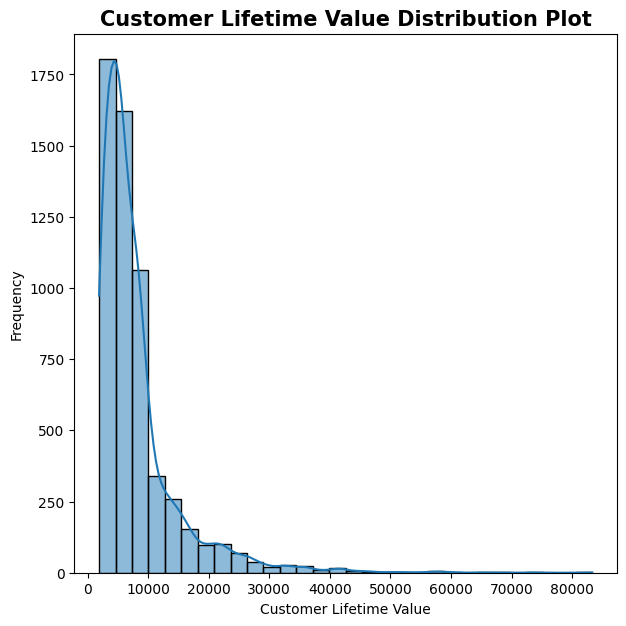

In [6]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.histplot(df["Customer Lifetime Value"], kde=True, bins=30)  # Histogram dengan KDE
plt.title("Customer Lifetime Value Distribution Plot", size=15, weight="bold")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
df["Customer Lifetime Value"].skew()

np.float64(3.06110718900048)

Berdasarkan plot distribusi Customer Lifetime Value (CLV) di atas, terlihat bahwa distribusi tersebut mengalami right-skewed atau terdistorsi ke kanan, yang menunjukkan adanya skewness positif. Oleh karena itu, kita akan menerapkan log transformation untuk mengurangi skewness dan menggunakan metode yang lebih robust, seperti decision trees, termasuk random forest atau gradient boosting yang lebih robust terhadap outliers.

### Correlation

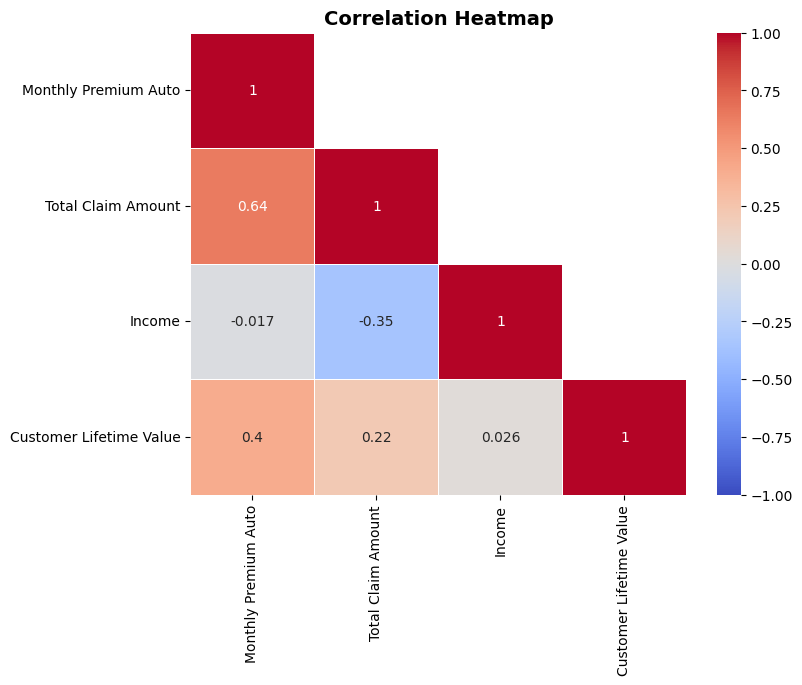

In [8]:
numerical_features = [
    "Monthly Premium Auto",
    "Total Claim Amount",
    "Income",
    "Customer Lifetime Value",
]

# Menghitung korelasi antar fitur
correlation_matrix = df[numerical_features].corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1),
)

plt.title("Correlation Heatmap", size=14, weight="bold")
plt.show()

- Monthly Premium Auto memiliki korelasi positif yang cukup kuat dengan Total Claim Amount sebesar 64% dan terhadap Customer Lifetime Value sebesar 40%, menunjukkan bahwa semakin tinggi Monthly Premium Auto, semakin tinggi Total Claim Amount dan CLV.
- Total Claim Amount memiliki korelasi `negatif` dengan Income sebesar 35%, menunjukkan bahwa pelanggan dengan Income lebih tinggi cenderung memiliki Total Claim Amount yang lebih rendah.
- Income tidak memiliki korelasi yang signifikan dengan Monthly Premium Auto sebesar 1.7%, menandakan bahwa Income tidak banyak mempengaruhi Monthly Premium Auto.
- Customer Lifetime Value menunjukkan korelasi yang relatif lemah dengan fitur Total Claim Amount 22% dan Income 2.6%, yang mengindikasikan bahwa CLV tidak terlalu dipengaruhi oleh Total Claim Amount atau Income.

Karena Customer Lifetime Value (CLV) menunjukkan korelasi dengan Monthly Premium Auto, penting untuk menganalisis scatterplot yang dibedakan berdasarkan hue dari masing-masing fitur kategorikal.

In [9]:
from matplotlib.ticker import FuncFormatter

#### Monthly Premium Auto vs CLV

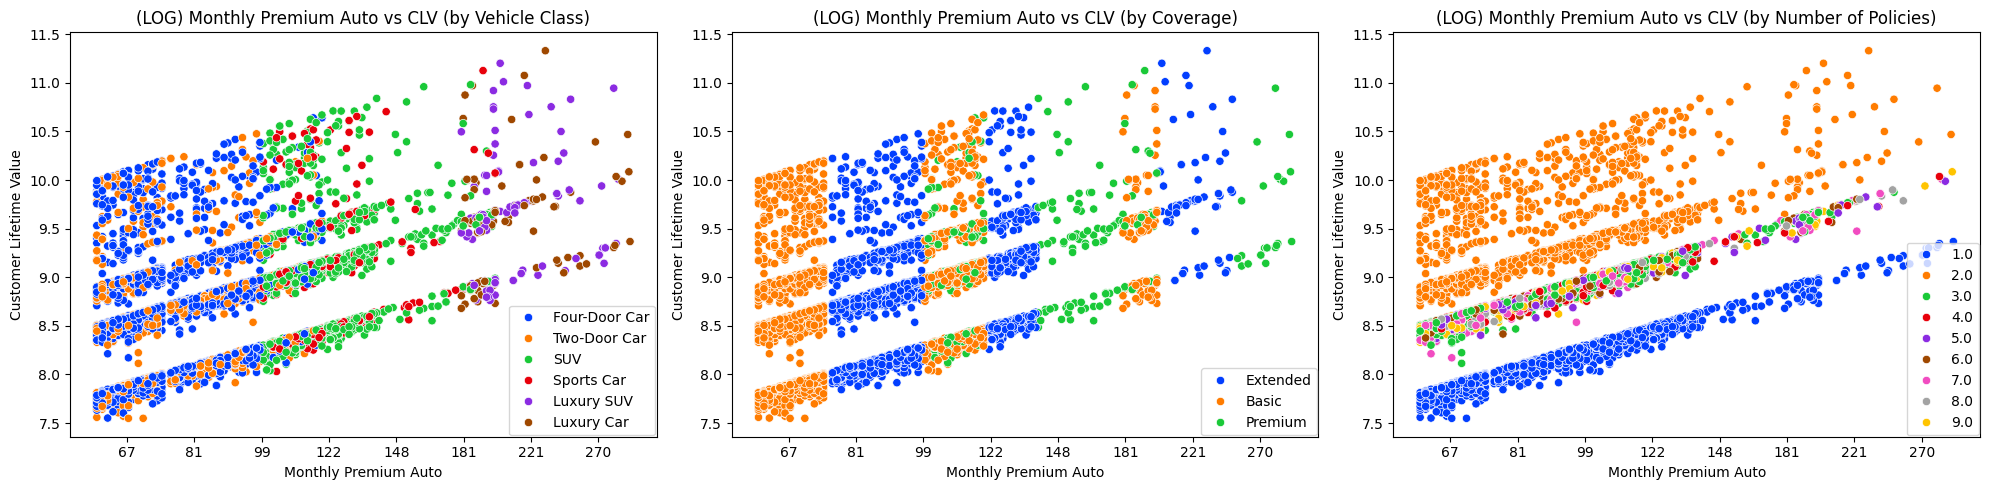

In [10]:
# Fungsi untuk mengubah kembali skala log ke skala asli
def inverse_log(x, _):
    return f"{np.exp(x):.0f}"  # np.expm1(x) adalah invers dari np.log1p(x)


clv_mpa = [
    "Vehicle Class",
    "Coverage",
    "Number of Policies",
]
plt.figure(figsize=(20, 5))
# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(clv_mpa):

    plt.subplot(1, 3, i + 1)  # Atur layout subplot (1 baris, 3 kolom)
    # Log transformasi untuk sumbu y dan x
    log_x = np.log(df["Monthly Premium Auto"])
    log_y = np.log(df["Customer Lifetime Value"])
    sns.scatterplot(
        data=df,
        x=log_x,
        y=log_y,
        hue=df[feature],
        palette="bright",
    )
    plt.title(f"(LOG) Monthly Premium Auto vs CLV (by {feature})", size=12)
    plt.xlabel("Monthly Premium Auto")
    plt.ylabel("Customer Lifetime Value")

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(inverse_log))
    # plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kanan bawah
    plt.legend(loc="lower right", bbox_to_anchor=(1, 0), borderaxespad=0.1)

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan
plt.show()

- 'Vehicle Class' menunjukkan adanya tingkatan atau hubungan implisit terhadap 'Monthly Premium Auto'
  - Kelas Bawah     : 'Four-Door Car' dan 'Two-Door Car'
  - Kelas Menengah  : 'SUV' dan 'Sport Car'
  - Kelas Atas      : 'Luxury SUV' dan 'Luxury Car'
- Terdapat pola yang jelas pada 'Coverage' pada grafik yang membagi data menjadi 8 kluster
  - 50 - 75   : Basic
  - 75 - 100  : Extended
  - 100 - 125 : Basic dan Premium
  - 125 - 150 : Extended
  - 150 - 200 : Premium
  - 175 - 200 : Basic
  - 200 - 250 : Extended
  - 250 - 300 : Premium  
Pola ini terjadi karena perusahaan mengatur produk asuransi berdasarkan segmen pelanggan yang berbeda
- 'Number of Policies' menunjukkan adanya tingkatan urutan terhadap 'Customer Lifetime Value'
  - 1 Polis : Pelanggan dengan 1 polis mungkin kurang loyal dan berkomitmen, sehingga mereka tidak diprioritaskan.
  - 2 Polis : Pelanggan dengan 2 polis mungkin berpotensi sehingga mereka diprioritaskan terlebih dahulu.
  - 3-9 Polis : Pelanggan yang memiliki 3 hingga 9 polis berada ditengah-tengah, mungkin disebabkan karena pelanggan tersebut bisa membawa risiko yang lebih besar dan biaya yang lebih tinggi bagi perusahaan.  

Kita perlu memerika apakah pelanggan dengan 2 polis memang lebih baik dari 3 atau lebih polis

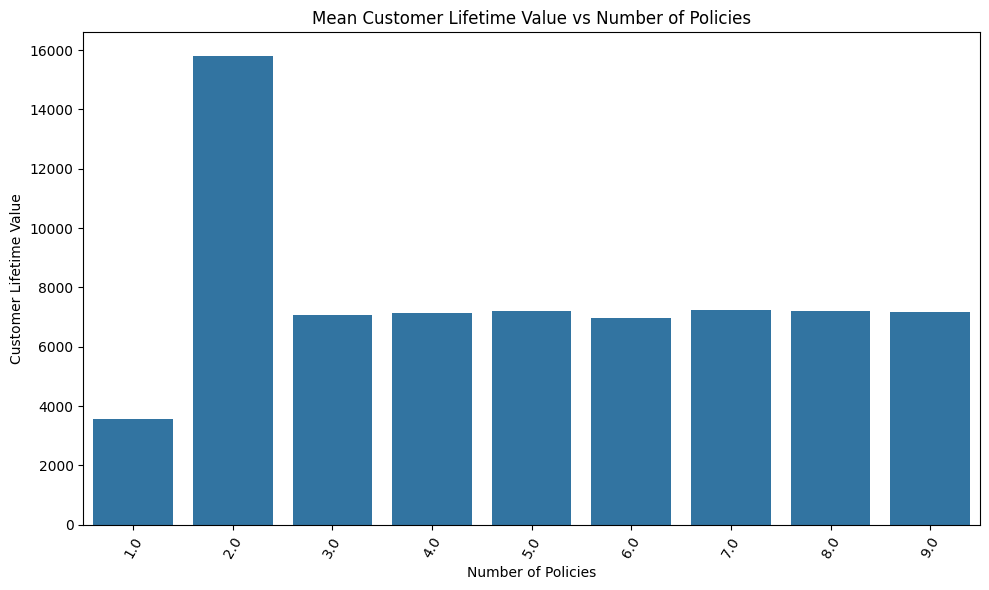

In [11]:
# Fitur x dan y
x_feature = 'Number of Policies'
y_feature = 'Customer Lifetime Value'

category_orders = ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0']

# Menghitung mean
mean_values = df.groupby(x_feature)[y_feature].mean()

# Mengonversi ke DataFrame untuk memudahkan plotting
mean_df = mean_values.reset_index().rename(columns={y_feature: 'Value'})
mean_df['Metric'] = 'Mean'  # Keep the metric for legend

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=x_feature, y='Value', data=mean_df, ci=None, order=category_orders
)

plt.title(f'Mean {y_feature} vs {x_feature}')  # Set title
plt.xlabel(x_feature)  # Set x-label
plt.ylabel(y_feature)  # Set y-label
plt.xticks(rotation=60)  # Rotate x labels if needed

plt.tight_layout()
plt.show()

Pada barplot di atas, terlihat bahwa pelanggan dengan 2 polis memiliki nilai lebih tinggi dibandingkan pelanggan dengan 3 atau lebih polis, sementara pelanggan dengan 1 polis cenderung kurang bernilai. Kemungkinan, pelanggan dengan 2 polis lebih menguntungkan karena memiliki profil risiko yang lebih rendah dan lebih mudah dikelola dibandingkan dengan pelanggan lainnya.

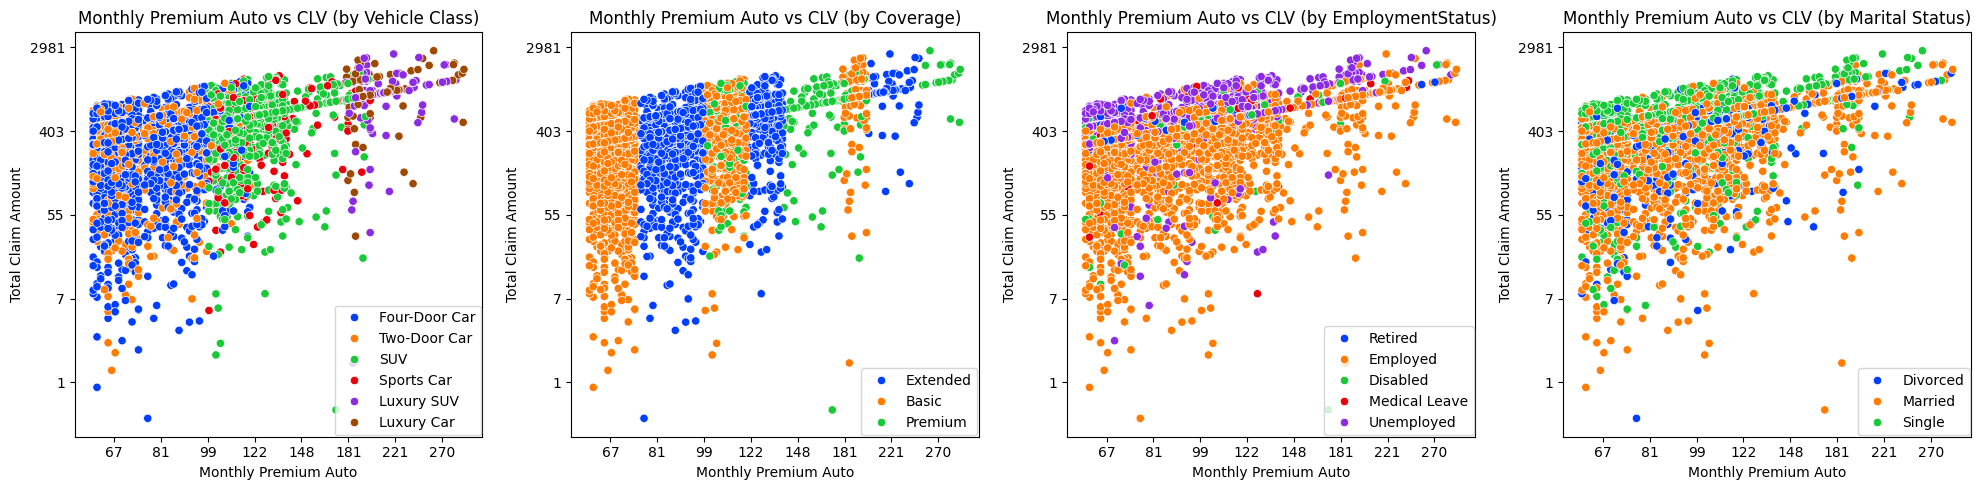

In [12]:
tca_mpa = [
    "Vehicle Class",
    "Coverage",
    "EmploymentStatus",
    "Marital Status",
]
plt.figure(figsize=(20, 5))

# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(tca_mpa):

    plt.subplot(1, 4, i + 1)  # Atur layout subplot (1 baris, 4 kolom)
    # Log transformasi untuk sumbu y dan x
    log_x = np.log(df["Monthly Premium Auto"])
    log_y = np.log(df["Total Claim Amount"])
    sns.scatterplot(
        data=df,
        x=log_x,
        y=log_y,
        hue=df[feature],
        palette="bright",
    )
    plt.title(f"Monthly Premium Auto vs CLV (by {feature})", size=12)
    plt.xlabel("Monthly Premium Auto")
    plt.ylabel("Total Claim Amount")

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(inverse_log))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kanan bawah
    plt.legend(loc="lower right", bbox_to_anchor=(1, 0), borderaxespad=0.1)

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan

plt.show()

'EmploymentStatus' menunjukkan adanya pola terhadap 'Total Claim Amount' pada scatterplot. Pelanggan dengan status 'Unemployed' mengajukan Claim paling tinggi dari semua kategori, hal ini mungkin disebabkan oleh keterbatasan finansial yang membuat mereka lebih cenderung mengajukan klaim.

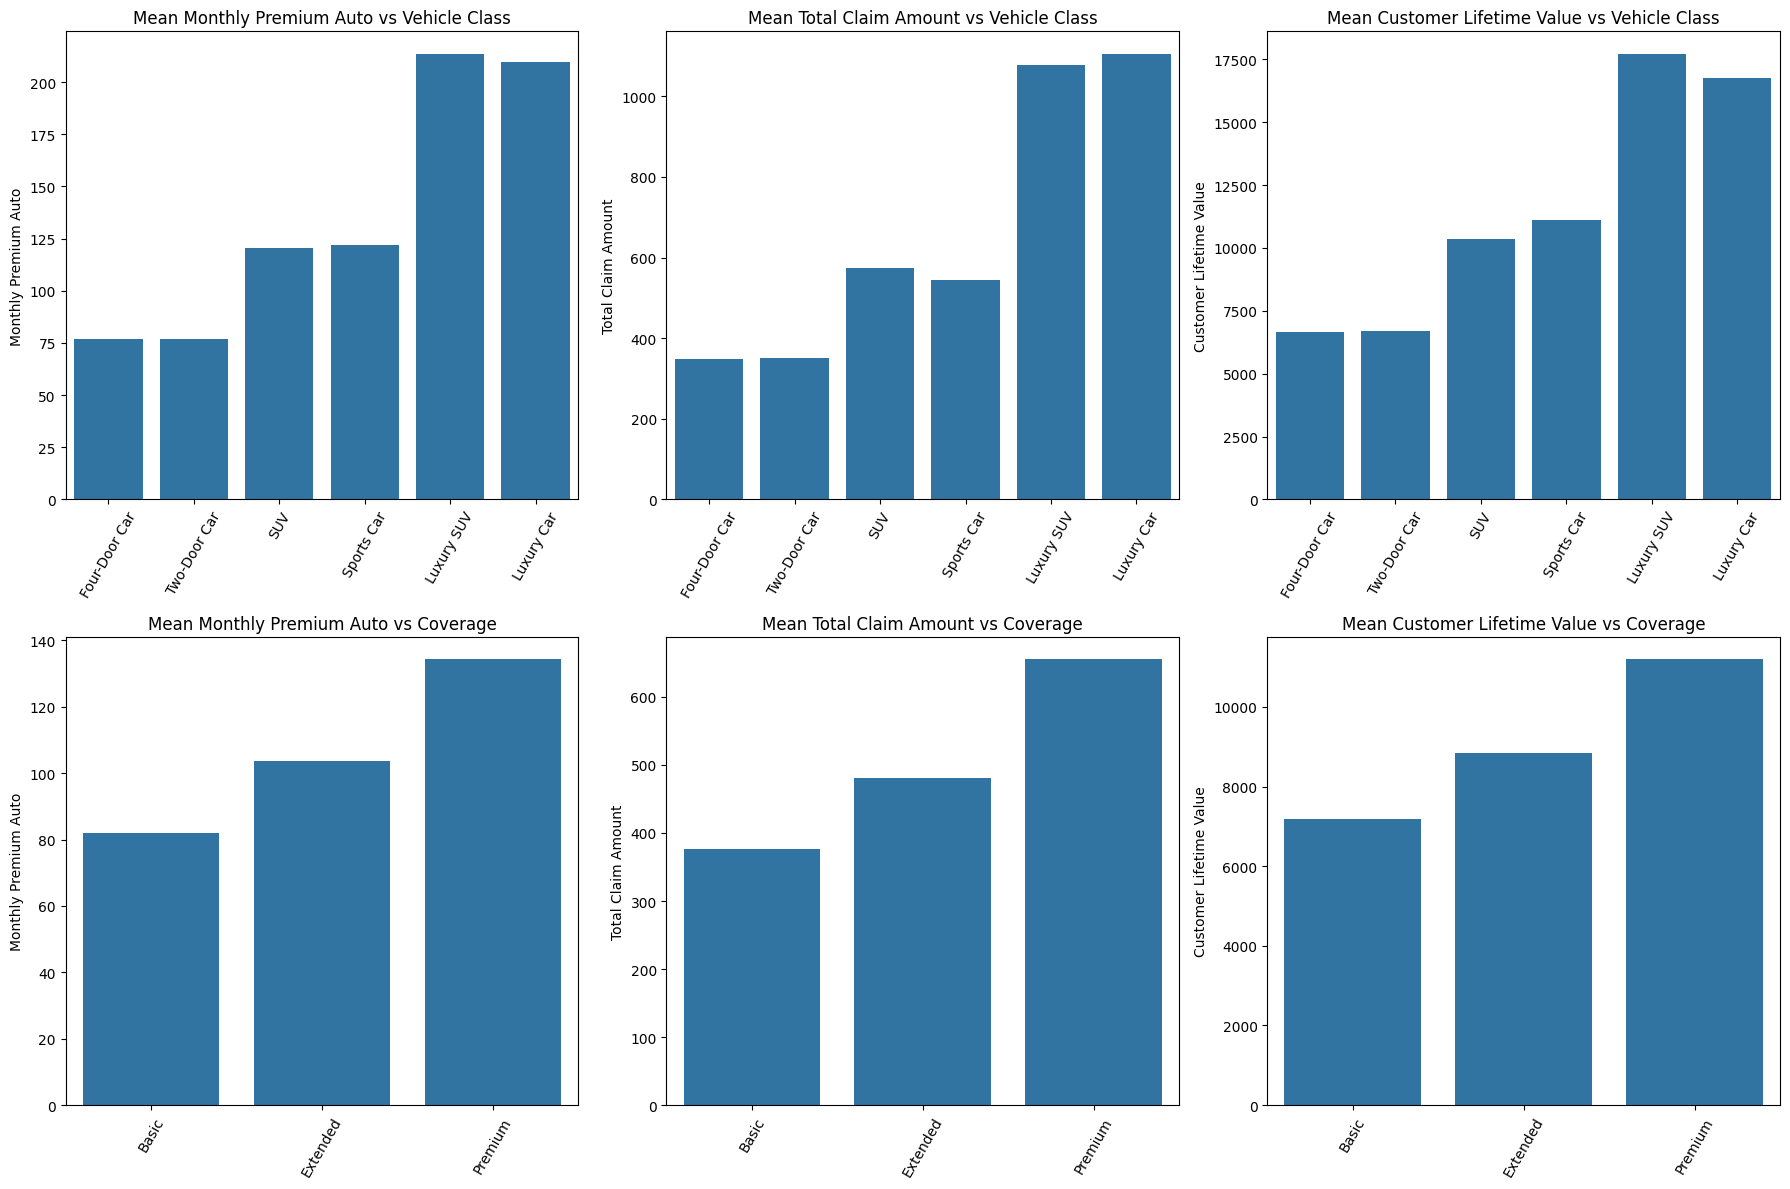

In [13]:
# Fitur baru yang akan digunakan
categorical_features = [
    'Vehicle Class',
    'Coverage'
]

num_features = [
    "Monthly Premium Auto",
    "Total Claim Amount",
    "Customer Lifetime Value",
]

# Define the category orders for each categorical feature (jika diperlukan)
category_orders = {
    'Vehicle Class': df['Vehicle Class'].value_counts().index.tolist(),
    'Coverage': df['Coverage'].value_counts().index.tolist()
}

# Menggunakan subplots untuk membuat grid plot (2x3)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=False)

# Loop melalui setiap fitur kategorikal dan numerikal untuk membuat grafik bar
for i, cat_feature in enumerate(categorical_features):
    for j, num_feature in enumerate(num_features):
        # Menghitung mean
        mean_values = df.groupby(cat_feature)[num_feature].mean()
        
        # Mengonversi ke DataFrame untuk memudahkan plotting
        mean_df = mean_values.reset_index().rename(columns={num_feature: 'Value'})
        
        # Membuat bar plot dengan urutan kategori berdasarkan jumlah terbanyak
        ax = sns.barplot(
            x=cat_feature, y='Value', data=mean_df,
            ax=axes[i, j], ci=None, width=0.8, order=category_orders.get(cat_feature, None)
        )

        axes[i, j].set_title(f'Mean {num_feature} vs {cat_feature}')  # Set title for each subplot
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel(num_feature)  # Set y-label for each subplot
        
        # Menggunakan plt.xticks untuk rotasi label x tanpa memperingatkan
        axes[i, j].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()


Pada barplot di atas, kita menganalisis pengaruh fitur kategorikal Vehicle Class dan Coverage terhadap fitur numerik MPA, TCA, dan CLV. Ketiga fitur numerik ini menunjukkan pola kenaikan yang serupa, yang menandakan adanya keterkaitan di antara mereka.

Pada fitur Vehicle Class, kategori 'Four-Door Car' dan 'Two-Door Car' memiliki nilai terendah, sementara 'SUV' dan 'Sport Car' berada di tingkat menengah, dan 'Luxury SUV' serta 'Luxury Car' memiliki nilai tertinggi. Begitu juga dengan fitur Coverage, di mana kategori Basic menunjukkan nilai terendah, Extended berada di tengah, dan Premium menunjukkan nilai tertinggi.

### Income vs CLV

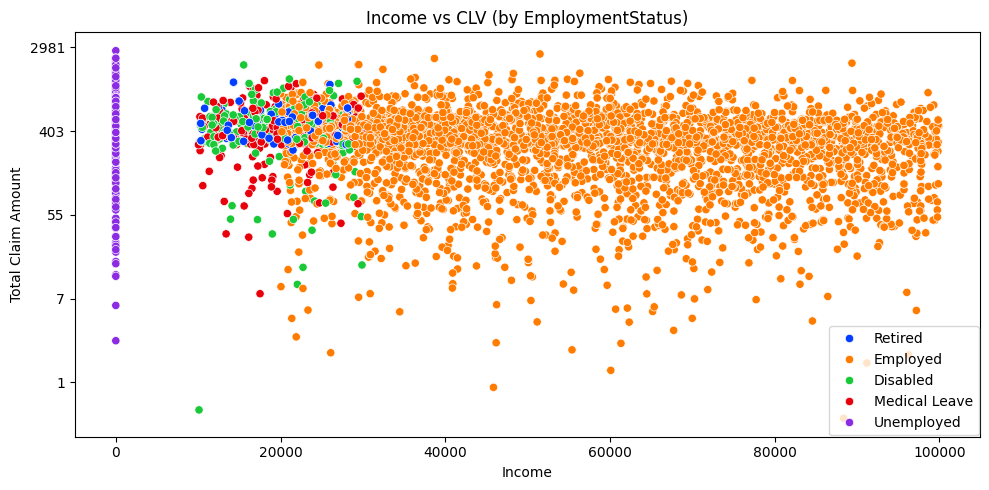

In [14]:
tca_income = [
    "EmploymentStatus",
]
plt.figure(figsize=(10, 5))

# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(tca_income):

    plt.subplot(1, 1, i + 1)  # Atur layout subplot (1 baris, 4 kolom)
    log_y = np.log(df["Total Claim Amount"])
    sns.scatterplot(
        data=df,
        x=df[
            "Income"  # Income tidak memiliki skewness atau outliers, jadi kita tidak perlu menerapkan Log untuk Income
        ],
        y=log_y,
        hue=df[feature],
        palette="bright",
    )
    plt.title(f"Income vs CLV (by {feature})", size=12)
    plt.xlabel("Income")
    plt.ylabel("Total Claim Amount")

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kanan atas
    plt.legend(loc="lower right", bbox_to_anchor=(1, 0), borderaxespad=0.1)

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan

plt.show()

Pada scatterplot Income terlihat jelas bahwa:
- Employed memiliki Income paling besar dari semua kategori
- Disabled, Medical Leave dan Retired berada di tengah-tengah
- Unemployed tidak memiliki Income sama sekali

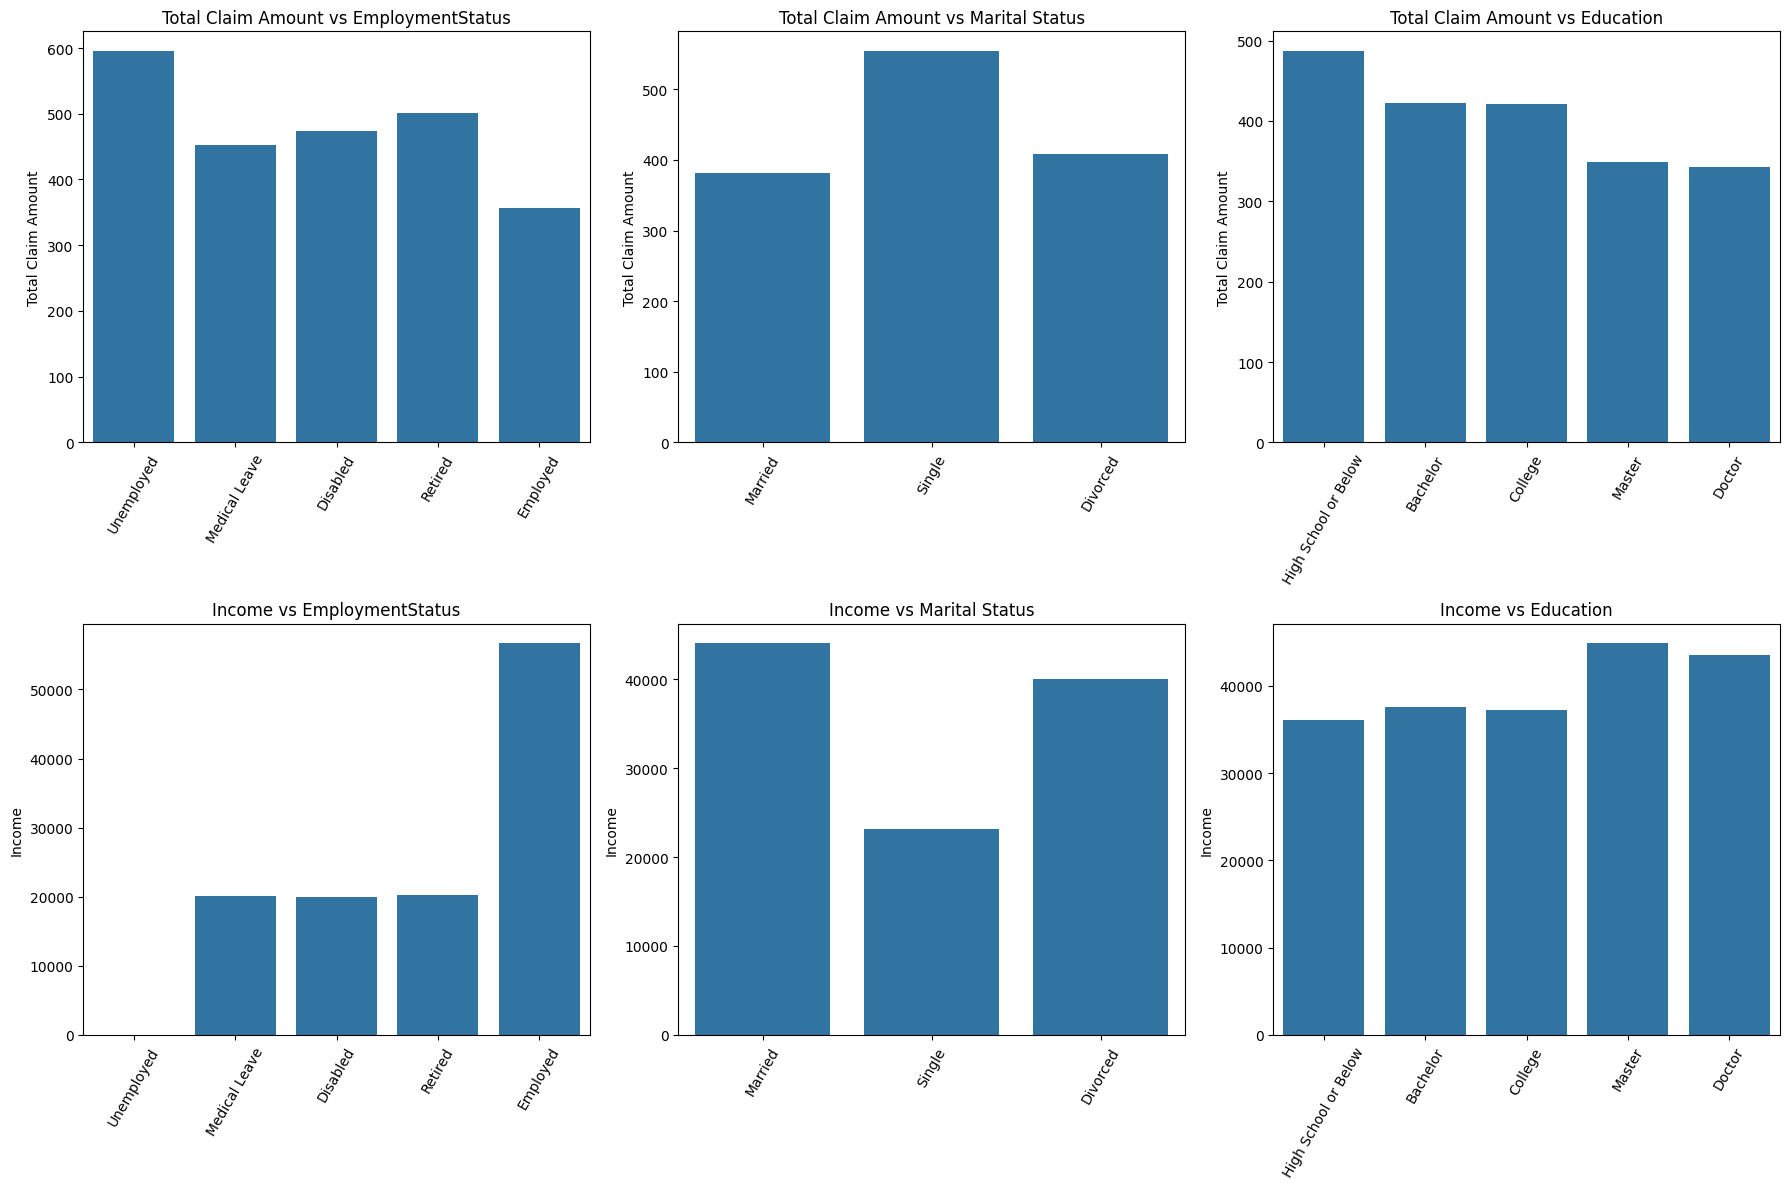

In [15]:
categorical_features = ['EmploymentStatus','Marital Status','Education']
num_features = ["Total Claim Amount","Income"]

category_orders = {
    'Marital Status': df['Marital Status'].value_counts().index.tolist(),
    'EmploymentStatus': ['Unemployed', 'Medical Leave', 'Disabled', 'Retired', 'Employed'],
    'Education': ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'],
}

# Menggunakan subplots untuk membuat grid plot (2x3)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=False)

# Loop melalui setiap fitur numerik dan kategorikal untuk membuat grafik bar
for j, num_feature in enumerate(num_features):  # Baris untuk fitur numerik
    for i, cat_feature in enumerate(categorical_features):  # Kolom untuk fitur kategorikal
        mean_values = df.groupby(cat_feature)[num_feature].mean()
        
        # Mengonversi ke DataFrame untuk memudahkan plotting
        mean_df = mean_values.reset_index().rename(columns={num_feature: 'Value'})
        
        # Membuat bar plot dengan urutan kategori berdasarkan jumlah terbanyak
        ax = sns.barplot(
            x=cat_feature, y='Value', data=mean_df,
            ax=axes[j, i], ci=None, width=0.8, order=category_orders.get(cat_feature, None)
        )

        axes[j, i].set_title(f'{num_feature} vs {cat_feature}')
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel(num_feature)
        axes[j, i].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()


Pada barplot di atas, kita menganalisis hubungan antara fitur numerik TCA dan Income terhadap fitur kategorikal Employment Status, Marital Status, dan Education. Berikut adalah beberapa kesimpulan yang didapat pada analisis ini:

- Employment Status vs TCA: Grafik menunjukkan bahwa pelanggan yang berstatus Unemployed (pengangguran) mengajukan klaim (Total Claim Amount) paling tinggi, meskipun mereka tidak memiliki penghasilan. Sebaliknya, pelanggan yang Employed (bekerja) justru mengajukan klaim paling sedikit. Hal ini mungkin karena pelanggan yang bekerja memiliki penghasilan yang cukup sehingga tidak terlalu bergantung pada klaim asuransi.

- Marital Status vs TCA: Pelanggan yang Single lebih sering mengajukan klaim dibandingkan yang lain. Hal ini mungkin disebabkan oleh pendapatan yang lebih rendah, terlihat pada grafik Income vs. Marital Status yang menunjukkan bahwa pelanggan Single memiliki pendapatan terendah. Selain itu, pelanggan yang Single mungkin masih berada di tahap pendidikan High School or Below atau kurang pengalaman kerja, yang memengaruhi keaktifan mereka dalam mengajukan klaim.

- Education vs TCA: Pelanggan dengan pendidikan High School or Below mengajukan klaim paling banyak. Sebaliknya, pelanggan yang berpendidikan Master dan Doctor mengajukan klaim paling sedikit. Hal ini mungkin disebabkan oleh pendapatan mereka yang lebih tinggi, atau karena pengalaman kerja lebih banyak. Grafik Income vs. Education juga menunjukkan bahwa pelanggan dengan pendidikan lebih tinggi cenderung memiliki pendapatan yang lebih besar.

Dari ketiga poin di atas, dapat disimpulkan bahwa terdapat hubungan negatif (berbanding terbalik) antara TCA dan Income. Semakin tinggi TCA, semakin rendah Income, dan sebaliknya, semakin rendah Income, semakin tinggi TCA. Kesimpulan ini juga diperkuat oleh analisis heatmap sebelumnya, yang menunjukkan korelasi negatif sebesar -0.38.

### Total Claim Amount vs CLV

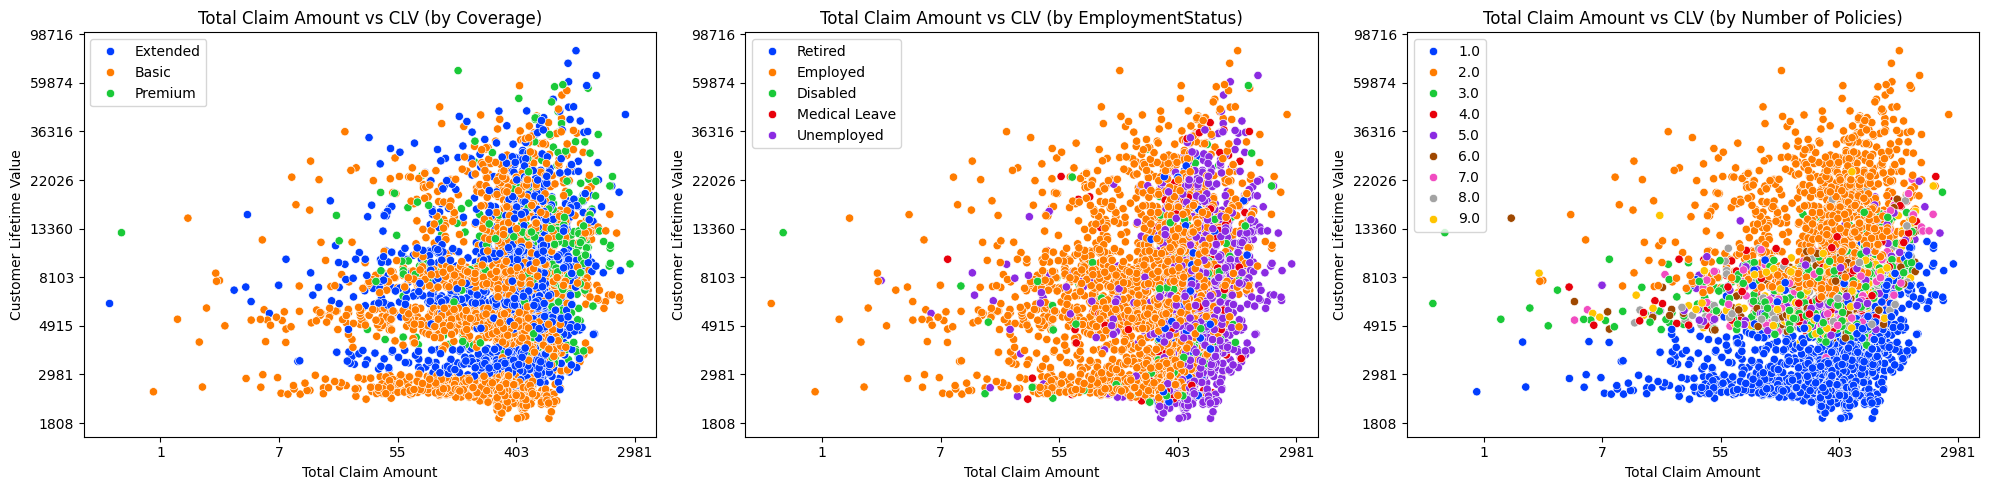

In [16]:
tca_clv = [
    "Coverage",
    "EmploymentStatus",
    "Number of Policies",
]

plt.figure(figsize=(20, 5))

# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(tca_clv):
    plt.subplot(1, 3, i + 1)  # Atur layout subplot (1 baris, 3 kolom)

    # Log transformasi untuk sumbu y dan x
    log_y = np.log(df["Customer Lifetime Value"])
    log_x = np.log(df["Total Claim Amount"])

    sns.scatterplot(
        data=df,
        y=log_y,
        x=log_x,
        hue=feature,
        palette="bright",
    )

    # Menggunakan label asli meskipun ada log transformasi
    plt.title(f"Total Claim Amount vs CLV (by {feature})", size=12)
    plt.xlabel("Total Claim Amount")  # Label asli
    plt.ylabel("Customer Lifetime Value")  # Label asli

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(inverse_log))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kiri atas
    plt.legend(loc="upper left", bbox_to_anchor=(0, 1))

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan
plt.show()

## 3. PREPROCESING

Data cleaning sangat penting untuk memastikan bahwa data yang kita gunakan akurat, konsisten, dan bebas dari kesalahan. Proses ini mencakup penanganan nilai yang hilang (missing values), penghapusan data duplikat, perbaikan kesalahan data (data errors), serta pengelolaan outliers yang dapat memengaruhi hasil analisis.

### Missing Values
Missing values dapat merusak integritas data dan mengurangi kualitas analisis, data yang tidak lengkap dapat menyebabkan hasil analisis yang tidak akurat. 

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print(f'Missing Value : \n{missing_values}')

Missing Value : 
Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64


### Data Anomali
Kita perlu memeriksa data anomali, seperti kasus di mana total Income = 0 tetapi EmploymentStatus bukan 'Unemployed'. Perlu dilihat apakah ada status pekerjaan selain 'Unemployed' yang tidak memiliki penghasilan

In [18]:
print(
    f'Jumah data Pekerja yang tidak memiliki Gaji : {len(df[(df["Income"] == 0) & (df["EmploymentStatus"] != "Unemployed")])}'
)
print(f'Jumah data Pengangguran : {len(df[(df["EmploymentStatus"] == "Unemployed")])}')

Jumah data Pekerja yang tidak memiliki Gaji : 0
Jumah data Pengangguran : 1429


Kita tidak akan menghapus data dengan status Unemployed yang tidak memiliki penghasilan, karena data tersebut masih diperlukan untuk analisis yang akan dilakukan selanjutnya

### Duplicated Data
Kita perlu memeriksa setiap data duplikat dalam dataset karena dapat memengaruhi analisis

In [19]:
df_duplicates = df.duplicated().sum()
print(f"Jumlah kolom duplikat : {df_duplicates}\n")  # cek data duplikat

df[df.duplicated()].sort_values(by="Customer Lifetime Value").head()

Jumlah kolom duplikat : 618



Vehicle Class Coverage Renew Offer Type EmploymentStatus Marital Status  \
4883  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
3524  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
3673  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
2675  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
3968  Four-Door Car    Basic           Offer3          Retired        Married   

                 Education  Number of Policies  Monthly Premium Auto  \
4883               College                 1.0                  66.0   
3524               College                 1.0                  66.0   
3673               College                 1.0                  66.0   
2675               College                 1.0                  66.0   
3968  High School or Below                 1.0                  61.0   

      Total Claim Amount   Income  Customer Lifetime Value  
4883               316.8      0.0              2004.350666  
3524               316.8      0.0              2004.350666  
3673               316.8      0.0              2004.350666  
2675               316.8      0.0              2004.350666  
3968               292.8  27972.0              2227.072755

Ditemukan 618 data duplikat pada dataset ini. Kita akan menghapus data duplikat tersebut untuk memastikan analisis yang lebih akurat dan menghindari bias yang dapat terjadi akibat data yang berulang

In [20]:
# Menghapus Baris Duplikat
df_before = df.copy()
df.drop_duplicates(inplace=True)

print(
    f"Jumlah kolom duplikat setelah cleaning : {df.duplicated().sum()}"
)  # cek kembali data duplikat
print(
    f"Persentase kolom terhapus : {(df_duplicates/total_rows*100):.2f}%"
)  # cek kembali data duplikat

Jumlah kolom duplikat setelah cleaning : 0
Persentase kolom terhapus : 10.90%


Setelah menghapus data duplikat, langkah selanjutnya adalah memeriksa jumlah variabel kategorikal dalam dataset.

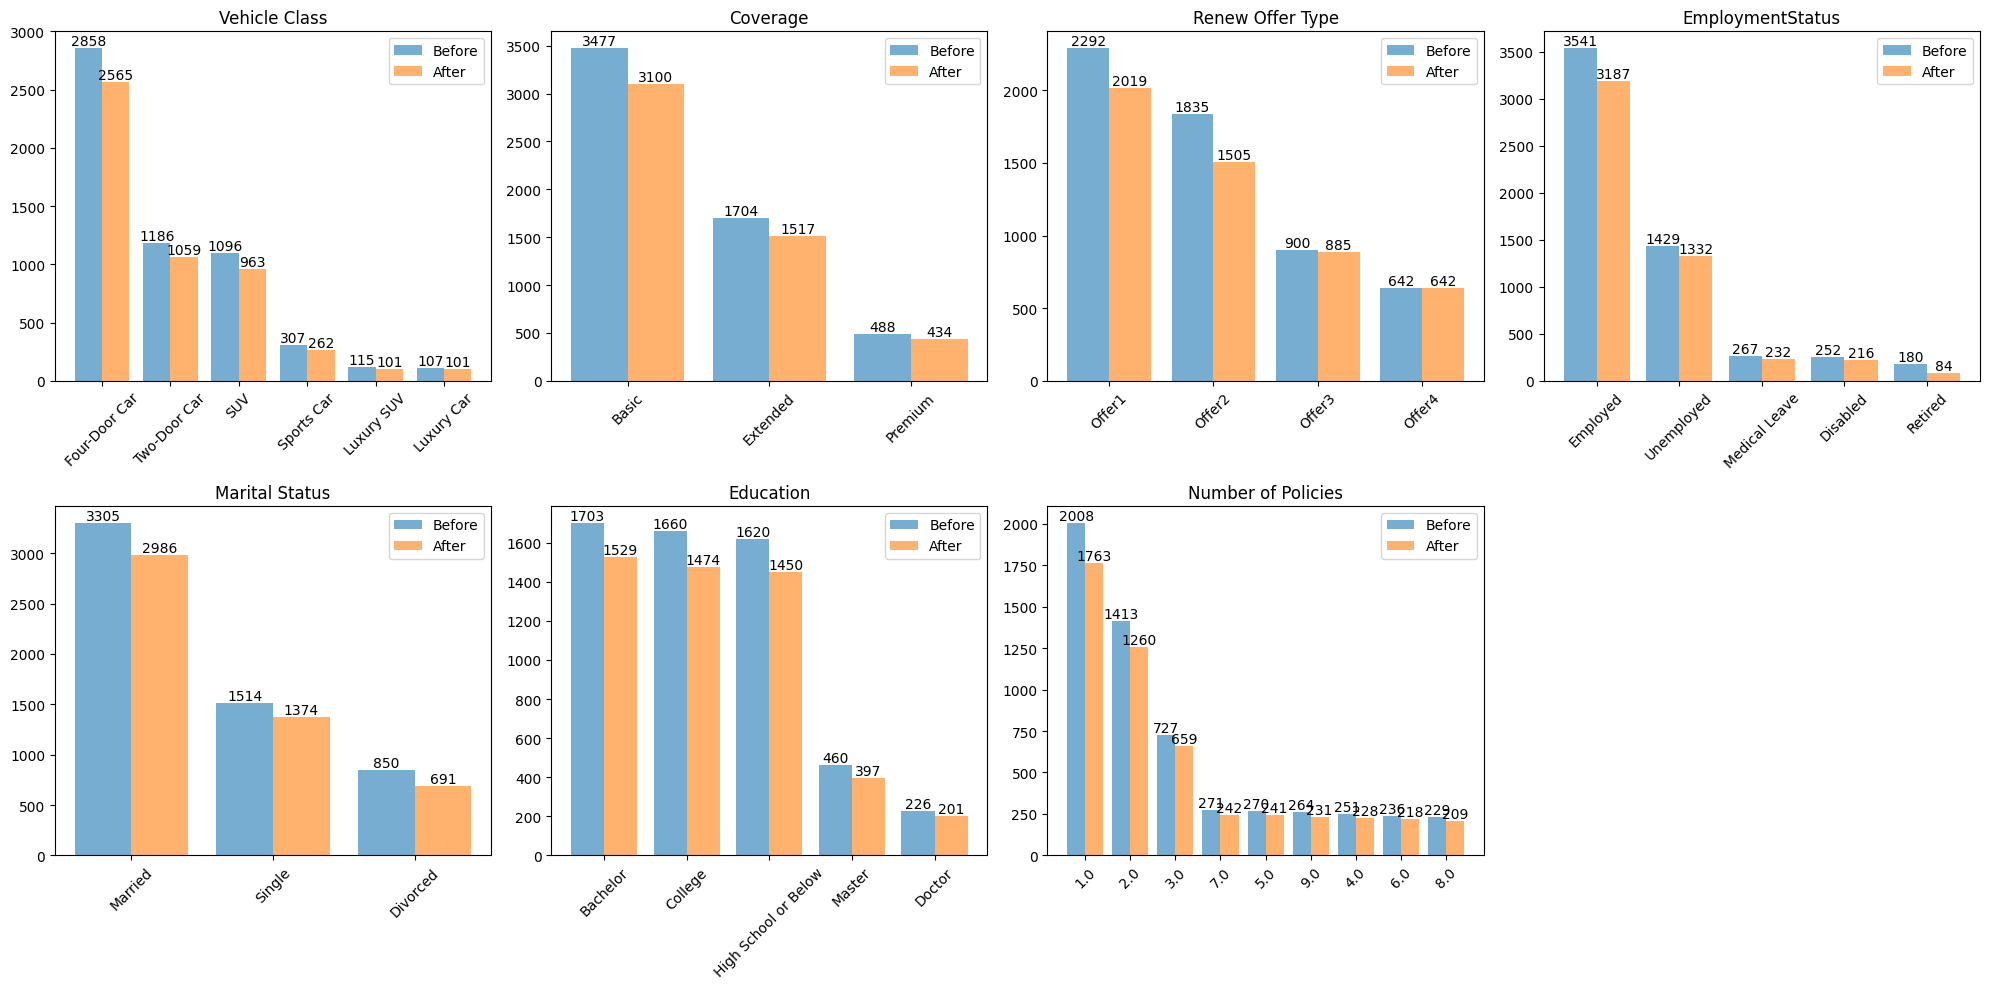

In [21]:
categorical_features = [
    "Vehicle Class",
    "Coverage",
    "Renew Offer Type",
    "EmploymentStatus",
    "Marital Status",
    "Education",
    "Number of Policies",
]

# Membuat subplot (2 baris, 4 kolom) untuk tumpang tindih sebelum dan sesudah penghapusan duplikat
plt.figure(figsize=(20, 10))
for i in range(len(categorical_features)):
    counts_before = df_before[categorical_features[i]].value_counts().sort_values(ascending=False)
    counts_after = df[categorical_features[i]].value_counts().sort_values(ascending=False)

    # Mendapatkan indeks untuk tumpang tindih
    indices = np.arange(len(counts_before))

    # Lebar bar
    width = 0.4

    plt.subplot(2, 4, i + 1)
    bars1 = plt.bar(indices, counts_before.values, width, label='Before', alpha=0.6)
    bars2 = plt.bar(indices + width, counts_after.values, width, label='After', alpha=0.6)

    # Menambahkan label jumlah di atas setiap bar
    for p in bars1:
        plt.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="bottom",
        )
    for p in bars2:
        plt.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="bottom",
        )

    plt.title(f"{categorical_features[i]}")
    plt.xticks(indices + width / 2, counts_before.index, rotation=45)
    plt.xlabel("")
    plt.legend()

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan
plt.show()

|Features|Deskripsi|
|-----|-----|
|Vehicle Class| Data menunjukkan bahwa pelanggan lebih banyak menggunakan kendaraan 4 pintu, dengan jumlah pelanggan yang jauh lebih banyak dibandingkan tipe kendaraan lainnya. Hal ini mungkin disebabkan oleh ketersediaan kendaraan dengan 4 pintu lebih ekonomis atau umum di pasar|
|Coverage| Mayoritas pelanggan memilih tipe Basic. Cakupan extended dan premium mengikuti setelahnya|
|Renew Offer Types| Jenis pembaruan Offer1 memiliki jumlah pelanggan tertinggi|
|Employment Status| Sebagian besar pelanggan memiliki pekerjaan yang memungkinkan mereka untuk membeli kendaraan|
|Marital Status| Pelanggan yang sudah menikah mendominasi data, menunjukkan bahwa status pernikahan memiliki pengaruh terhadap kepemilikan kendaraan|
|Education| Pelanggan dengan latar belakang pendidikan Bachelor, College, dan High School or Below memiliki jumlah yang hampir serupa. Sebaliknya, pelanggan yang memiliki gelar Master dan Doctor terlihat jauh lebih sedikit|
|Number of Policies| Pelanggan yang memiliki satu asuransi tercatat lebih banyak dibandingkan mereka yang memiliki dua atau tiga asuransi. Pelanggan dengan lebih dari tiga asuransi menunjukkan jumlah yang serupa|

### Outliers
Outliers dapat mempengaruhi analisis statistik dan model prediktif. Oleh karena itu, kita perlu memahami apakah mereka benar-benar signifikan atau hanya hasil dari kesalahan.

In [22]:
def outliers_():
    """
    Membuat visualisasi boxplot dan histogram untuk fitur numerik yang ditentukan.
    """
    # Daftar fitur numerik
    # Membuat figure untuk boxplot dan histogram
    plt.figure(figsize=(20, 10))

    # Membuat boxplot
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(2, 4, i)  # Atur layout subplot (2 baris, 4 kolom)
        sns.boxplot(x=df[feature])
        plt.title(f"{feature} - Boxplot")
        plt.xlabel("")
        plt.ylabel("")

    # Membuat histogram
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(2, 4, i + 4)  # Baris kedua untuk histogram
        sns.histplot(df[feature], kde=True)
        plt.title(f"{feature} - Histogram")
        plt.xlabel("")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

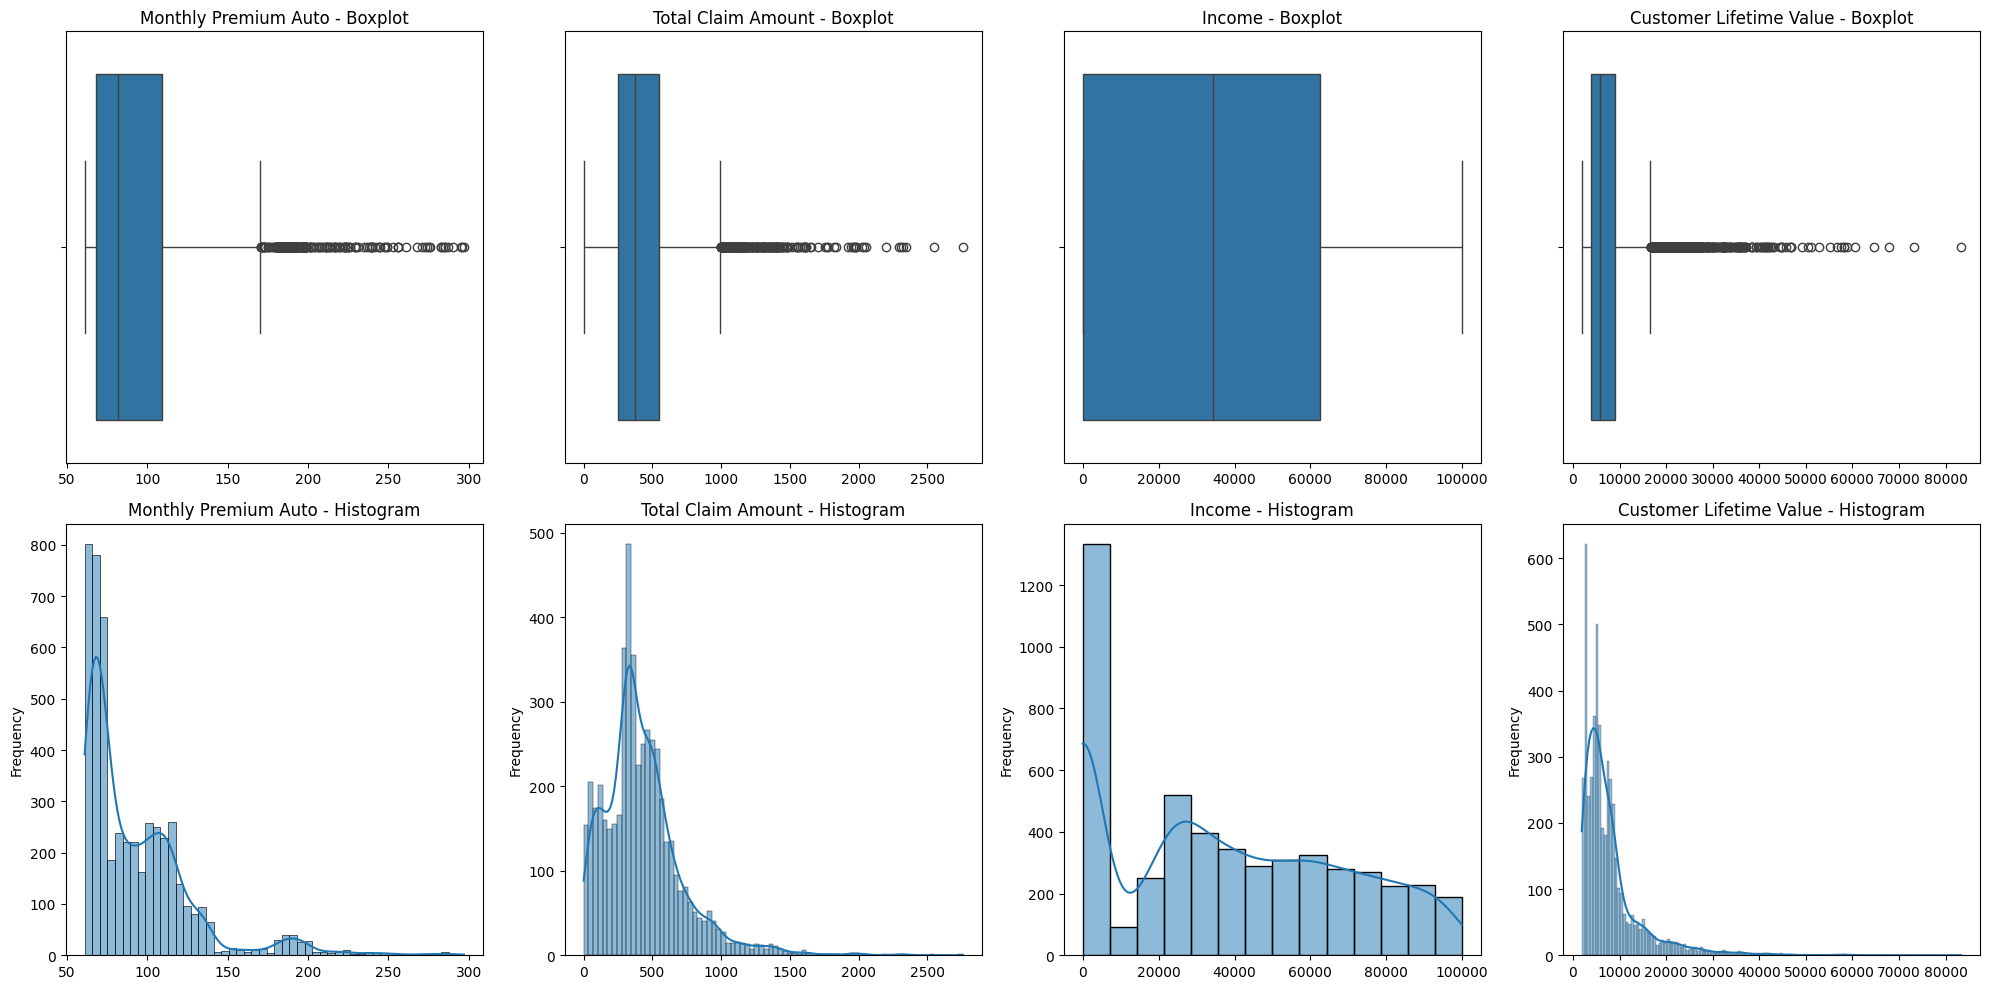

In [23]:
outliers_()

- Pada boxplot di atas, satu-satunya fitur yang tidak memiliki outlier hanya fitur Income.
- Pada histogram dapat disimpulkan bahwa semua fitur tidak terdistribusi normal

In [24]:
# Inisialisasi DataFrame untuk data tanpa outlier
df_old = df.copy()

def remove_outliers(numerical_features):
    global df  # Pastikan untuk menggunakan df global

    for feature in numerical_features:
        # Hitung Q1 (25th percentile) dan Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outlier
        df_outlier = (df[feature] < lower_bound) | (df[feature] > upper_bound)

        # Hapus outlier dari df
        df = df[~df_outlier]

In [25]:
# Buang outlier
remove_outliers(
    [
        "Monthly Premium Auto",
        "Total Claim Amount",
        "Customer Lifetime Value",
    ]
)

In [26]:
def outlier_comparison():
    """
    Membuat visualisasi histogram untuk membandingkan jumlah kategori sebelum dan setelah penghapusan outlier.
    """
    # Daftar fitur kategorikal
    cat_features = [
        "Vehicle Class",
        "Coverage",
        "Renew Offer Type",
        "EmploymentStatus",
        "Marital Status",
        "Education",
    ]

    # Membuat figure untuk histogram
    plt.figure(figsize=(20, 10))

    # Iterasi melalui setiap fitur kategorikal
    for i, feature in enumerate(cat_features, 1):
        plt.subplot(2, 3, i)  # Mengatur subplot dalam grid 3x2

        # Histogram sebelum penghapusan outlier
        sns.countplot(
            data=df_old,
            x=feature,
            order=df_old[feature].value_counts().index,
            alpha=0.5,
            color="blue",
            label="Before Outlier Removal",
        )

        # Histogram setelah penghapusan outlier
        sns.countplot(
            data=df,
            x=feature,
            order=df_old[feature].value_counts().index,
            alpha=0.8,
            color="orange",
            label="After Outlier Removal",
        )

        plt.suptitle("Comparison Before and After Outlier Removal", size=20)
        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Count")
        plt.legend()

    plt.tight_layout()  # Menyesuaikan layout
    plt.show()

Persentase data outliers yang dihapus : 15.32%


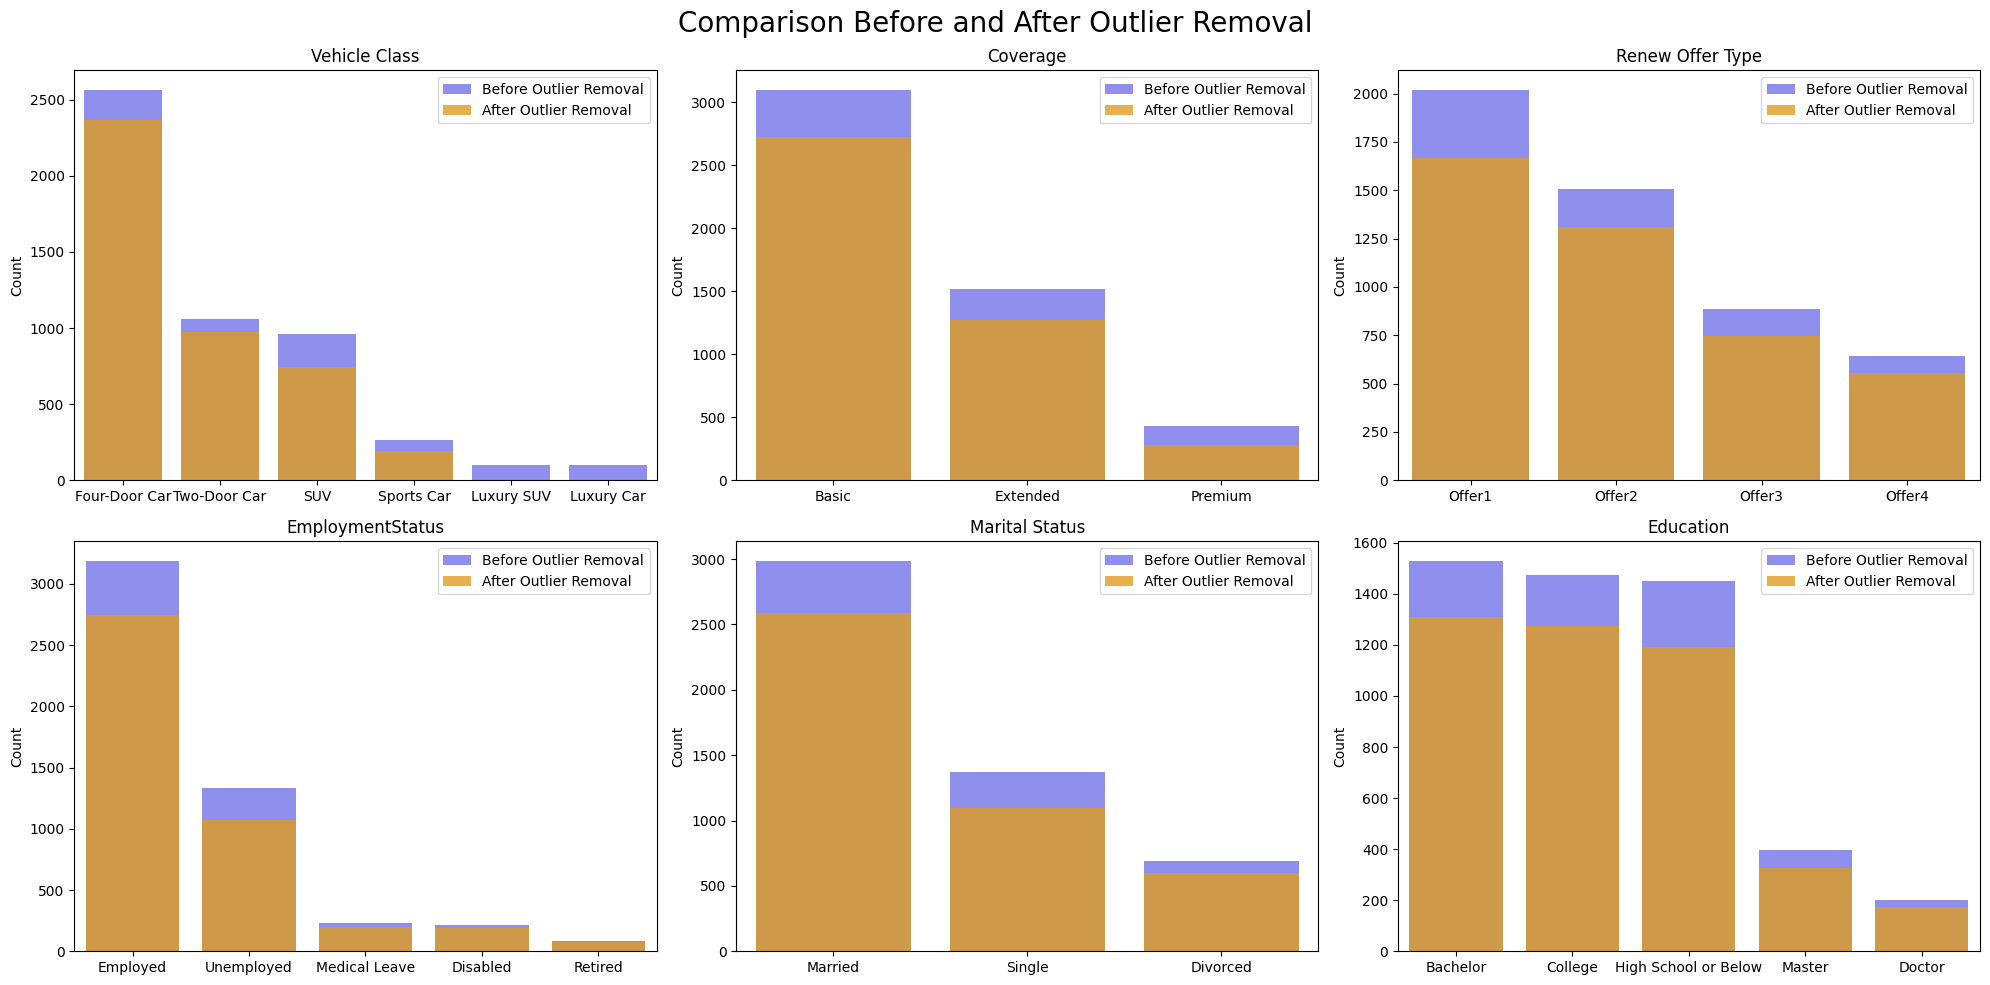

In [27]:
print(f'Persentase data outliers yang dihapus : {(len(df_old)-len(df))/len(df_old)*100:.2f}%')
outlier_comparison()

In [28]:
df["Vehicle Class"].value_counts()

Vehicle Class
Four-Door Car    2368
Two-Door Car      975
SUV               742
Sports Car        192
Name: count, dtype: int64

Setelah penghapusan outliers, kita dapat melihat bahwa 2 kategori dari 'Vehicle Class', yaitu 'Luxury Car' dan 'Luxury SUV' tidak terlihat. Oleh karena itu, kita perlu memeriksa fitur `numerik` mana yang berpengaruh terhadap 'Vehicle Class' dengan membandingkan setiap fitur numerik.

In [29]:
from itertools import combinations

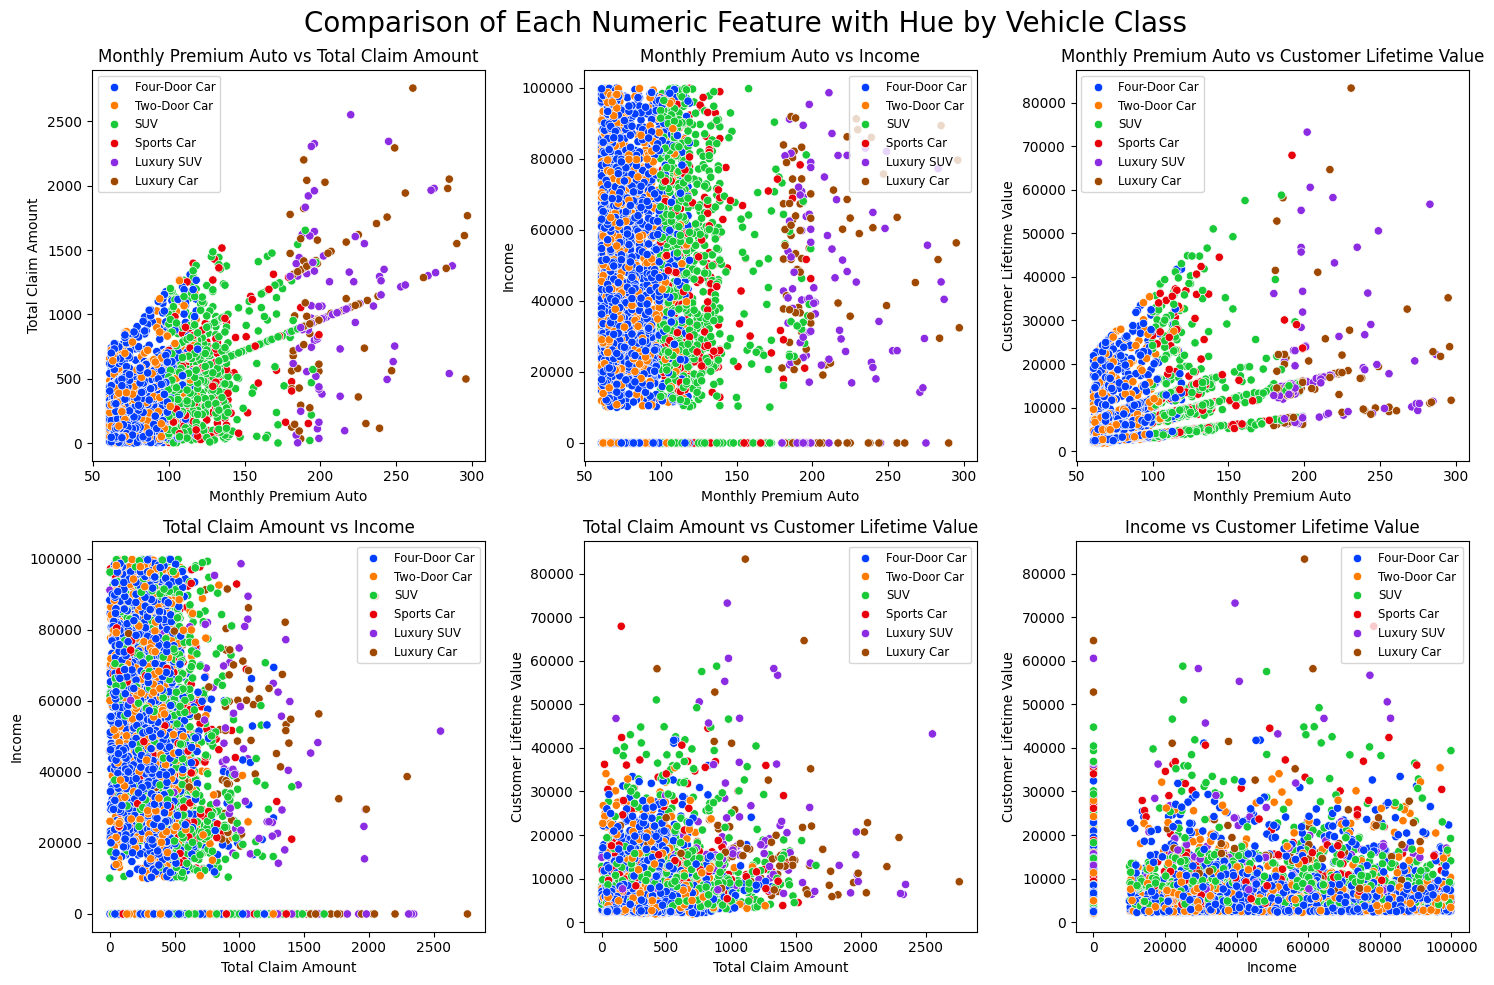

In [30]:
# Misalkan dataset sudah dimuat ke dalam DataFrame bernama clv
# clv = pd.read_csv('path_to_your_dataset.csv')


# Buat kombinasi semua pasangan fitur
feature_combinations = combinations(numerical_features, 2)

# Set ukuran gambar
plt.figure(figsize=(15, 10))
plt.suptitle("Comparison of Each Numeric Feature with Hue by Vehicle Class", size=(20))
# Loop untuk membuat scatterplot
for i, (x, y) in enumerate(feature_combinations, start=1):
    plt.subplot(2, 3, i)  # Menyesuaikan dengan jumlah subplot
    sns.scatterplot(data=df_old, x=x, y=y, hue="Vehicle Class", palette="bright")
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    # Mengatur ukuran font legend
    plt.legend(fontsize="small", title_fontsize="medium")

plt.tight_layout()
plt.show()

Pada grafik di atas, dapat dipastikan bahwa fitur numerik yang mempengaruhi 'Vehicle Class' sehingga menyebabkan hilangnya dua kategori ('Luxury Car' dan 'Luxury SUV') adalah fitur 'Monthly Premium Auto' dan 'Total Claim Amount'. Oleh karena itu, kita hanya akan menghapus outlier pada fitur 'Customer Lifetime Value'.

In [31]:
df = df_old.copy()  # Kembali ke dataframe sebelum penghapusan outliers

remove_outliers(
    [
        # "Monthly Premium Auto",
        # "Total Claim Amount",
        "Customer Lifetime Value",    # Sudah ditest jika outlier hanya dihapus pada fitur CLV, tidak ada perubahan yang terjadi
    ]
)

Persentase data outliers yang dihapus : 8.89%


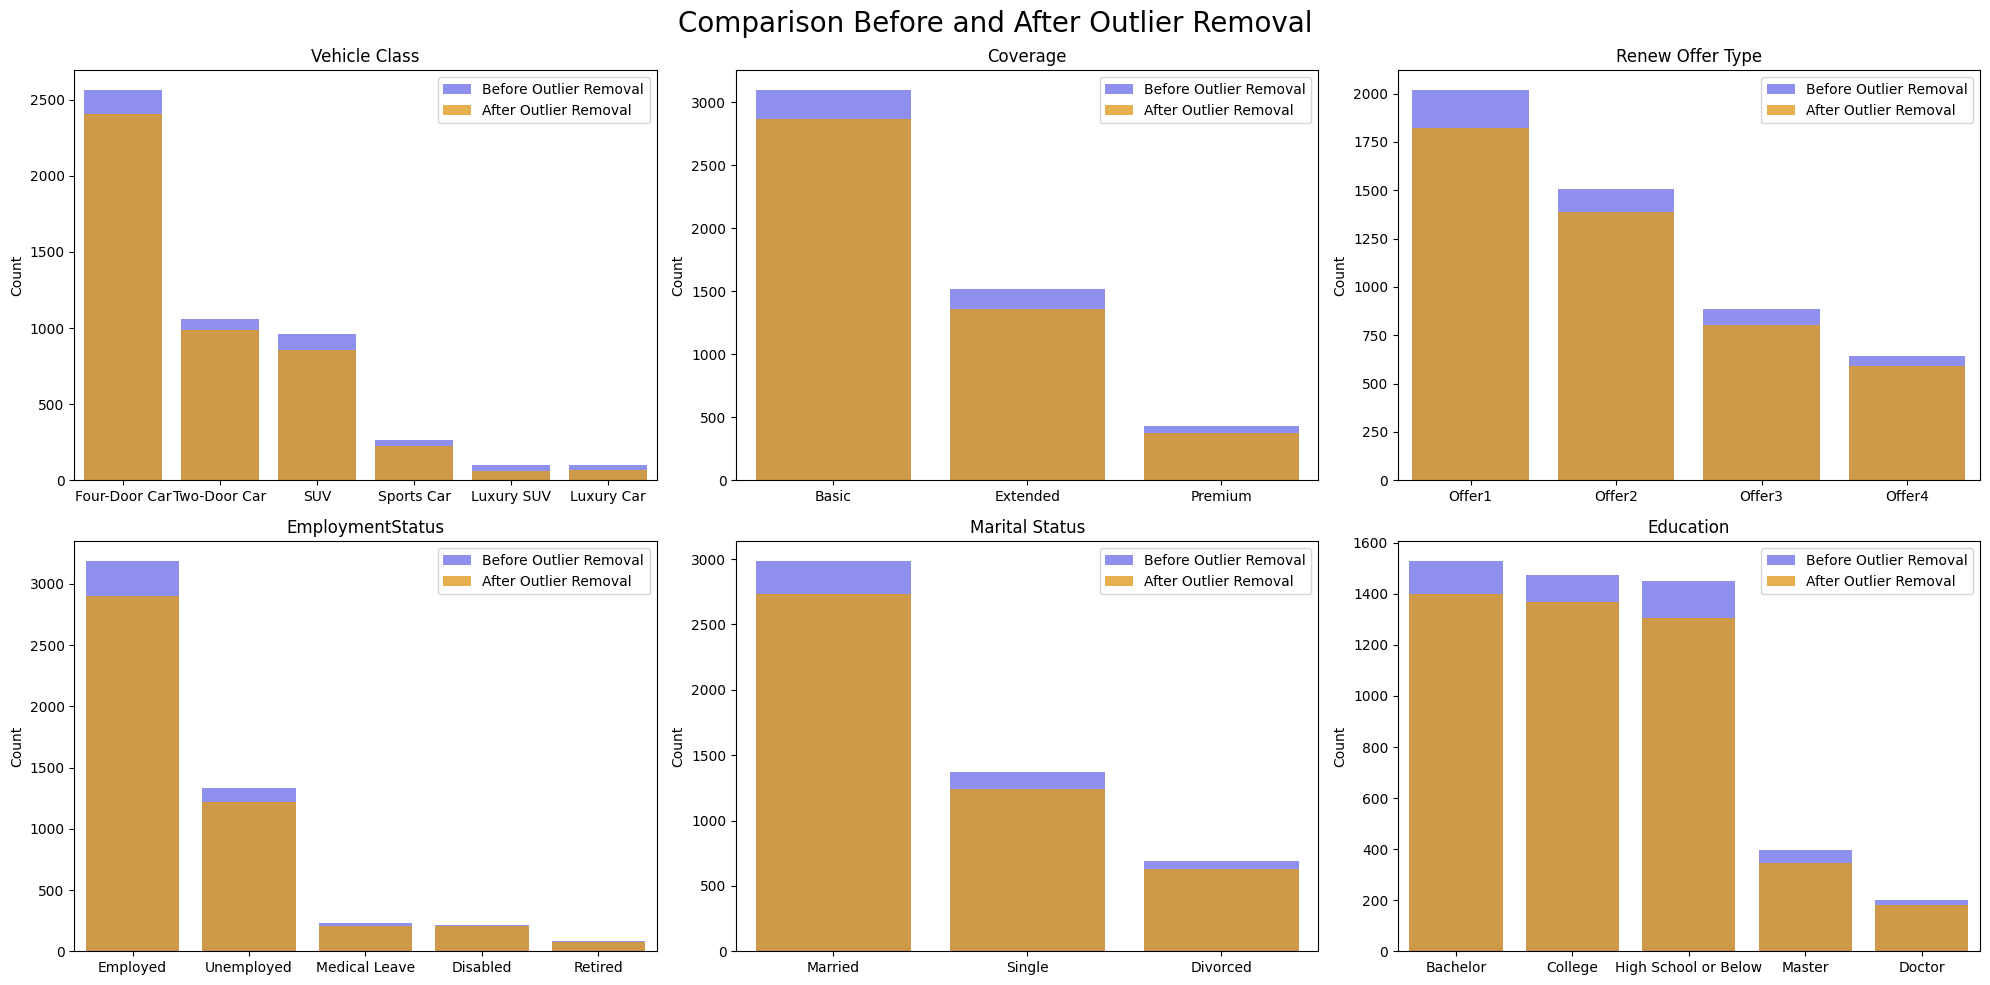

In [32]:
print(f'Persentase data outliers yang dihapus : {(len(df_old)-len(df))/len(df_old)*100:.2f}%')
outlier_comparison()

In [33]:
df["Vehicle Class"].value_counts()

Vehicle Class
Four-Door Car    2405
Two-Door Car      989
SUV               856
Sports Car        222
Luxury Car         68
Luxury SUV         62
Name: count, dtype: int64

Setelah penghapusan Outler (pengecualian untuk fitur CLV) dua kategori yang hilang ('Luxury Car' dan 'Luxury SUV') muncul kembali

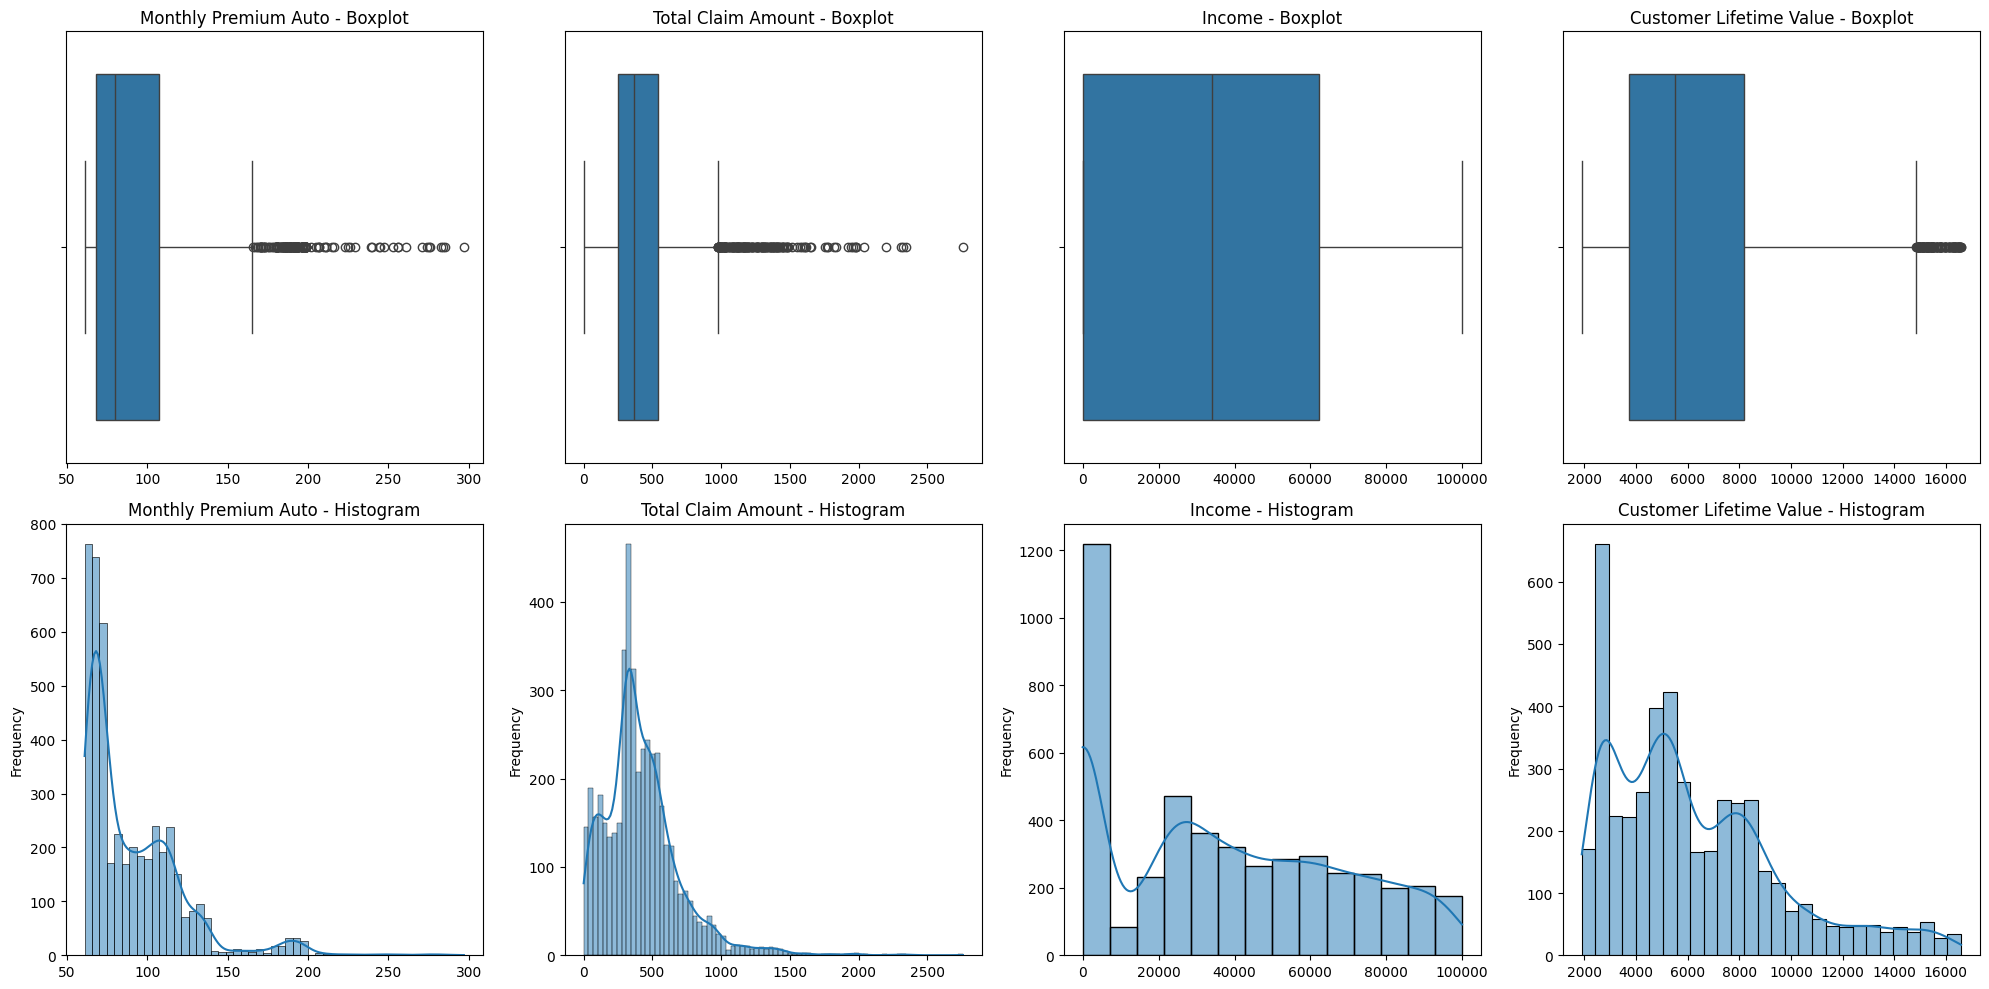

In [34]:
outliers_()

Kita akan menerapkan log transformation untuk mengurangi skewness dalam distribusi data. Selain itu, kita akan menggunakan metode yang lebih robust terhadap outlier, seperti 'Decision Trees', termasuk 'Random Forest' dan 'Gradient Boosting'. Metode ini dapat menangani outlier dengan lebih baik dan memberikan hasil yang lebih akurat tanpa menghilangkan informasi berharga yang terkandung dalam data.

In [35]:
# Menyimpan DataFrame yang sudah melalui proses cleaning
df.to_csv("CLV Dataframe.csv", index=False)

# 3. Feature Enginering

In [36]:
# Import library untuk modeling

from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    LinearRegression,
)

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    KFold,
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)
from sklearn.pipeline import Pipeline

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

Dataset yang kita gunakan untuk melatih model machine learning tidak bisa langsung diterapkan , karena model hanya menerima input data dalam bentuk numerik. Oleh karena itu, kita perlu melakukan transformasi data terlebih dahulu melalui proses encoding agar fitur-fitur kategorikal bisa berubah menjadi angka.

Fitur seperti Vehicle Class, Coverage, Renew Offer Type, Employment Status, Education, dan Number of Policies akan di-encode dengan ordinal encoding, karena kategori-kategori ini memiliki urutan atau tingkatan yang jelas. Binary encoding tidak digunakan di sini, karena jumlah kategori pada fitur-fitur ini relatif sedikit, sehingga ordinal lebih efektif.

Berikut rincian fitur yang di-encode dengan ordinal:

- Vehicle Class: Dibagi menjadi tiga level, yaitu kelas bawah (Four-door, Two-door), kelas menengah (SUV, Sport), dan kelas atas (Luxury SUV, Luxury Car).
- Coverage:  Tingkatan dari fitur ini sudah jelas, mulai dari Basic, Extended, hingga Premium, yang juga terlihat dari hasil analisis sebelumnya.
- Renew Offer Type: Urutannya terlihat jelas, mulai dari Offer1 hingga Offer4.
- Employment Status: Fitur ini juga sudah terbukti memiliki tingkatan, terlihat dari hubungan terhadap pendapatan (Income) dan Total Claim Amount (TCA).
- Education: Tingkatan pendidikan ini juga jelas dari hubungan dengan Income dan TCA, semakin tinggi pendidikan, biasanya pendapatannya juga lebih besar.
- Number of Policies: Ini menarik karena punya tiga level. Polis 1 di level terendah, polis 2 di level tertinggi, sementara polis 3-9 berada di tengah.


Untuk fitur yang tidak memiliki urutan atau tingkatan, seperti `Marital Status`, akan digunakan one-hot encoding. Status pernikahan tidak menunjukkan tingkatan yang signifikan, terlihat dari grafik hubungan antara Income dan TCA, sehingga encoding ini lebih sesuai.

Dengan melakukan encoding pada fitur-fitur ini, dataset akan lebih siap untuk digunakan oleh model machine learning, sehingga proses pelatihan dapat berlangsung secara lebih optimal.

In [37]:
ordinal_mapping = [
    {
        "col": "Vehicle Class",
        "mapping": {
            None: 0,
            "Four-Door Car": 1,
            "Two-Door Car": 1,
            "SUV": 2,
            "Sports Car": 2,
            "Luxury SUV": 3,
            "Luxury Car": 3,
        },
    },
    {"col": "Coverage", "mapping": {None: 0, "Basic": 1, "Extended": 2, "Premium": 3}},
    {
        "col": "Renew Offer Type",
        "mapping": {None: 0, "Offer1": 1, "Offer2": 2, "Offer3": 3, "Offer4": 4},
    },
    {
        "col": "EmploymentStatus",
        "mapping": {
            None: 0,
            "Unemployed": 1,
            "Medical Leave": 2,
            "Disabled": 2,
            "Retired": 2,
            "Employed": 3,
        },
    },
    {
        "col": "Education",
        "mapping": {
            None: 0,
            "High School or Below": 1,
            "College": 2,
            "Bachelor": 3,
            "Master": 4,
            "Doctor": 5,
        },
    },
    {
        "col": "Number of Policies",
        "mapping": {None: 0, 1: 1, 2: 3, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2},
    },
]

Pada langkah ini, kita akan mengubah fitur kategorikal menjadi numerik, serta melakukan normalisasi dan pembuatan fitur baru jika diperlukan.

In [38]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(drop="first"), ["Marital Status"]),
        # ("Binary", ce.BinaryEncoder(), ["Number of Policies	"]),
        (
            "ordinal",
            ce.OrdinalEncoder(
                cols=[
                    "Vehicle Class",
                    "Coverage",
                    "Renew Offer Type",
                    "EmploymentStatus",
                    "Education",
                    "Number of Policies",
                ],
                mapping=ordinal_mapping,
            ),
            [
                "Vehicle Class",
                "Coverage",
                "Renew Offer Type",
                "EmploymentStatus",
                "Education",
                "Number of Policies",
            ],
        ),
    ],
    remainder="passthrough",
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Vehicle Class',
                                                      'Coverage',
                                                      'Renew Offer Type',
                                                      'EmploymentStatus',
                                                      'Education',
                                                      'Number of Policies'],
                                                mapping=[{'col': 'Vehicle '
                                                                 'Class',
                                                          'data_type': dtype('O'),
                                                          'mapping': None             0
Four-Door Car    1
Two-Door Car     1
SUV              2
Sports Car       2
L...
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64},
                                                         {'col': 'Number of '
                                                                 'Policies',
                                                          'data_type': dtype('float64'),
                                                          'mapping': NaN    0
1.0    1
2.0    3
3.0    2
4.0    2
5.0    2
6.0    2
7.0    2
8.0    2
9.0    2
dtype: int64}]),
                                 ['Vehicle Class', 'Coverage',
                                  'Renew Offer Type', 'EmploymentStatus',
                                  'Education', 'Number of Policies'])])

## Data Splitting

Pisahkan data menjadi Train dan Test untuk melatih model dan menguji performanya.

In [39]:
# Memisahkan data independen variabel dengan target
X = df.drop(["Customer Lifetime Value"], axis=1)
y = df["Customer Lifetime Value"]

# Identifikasi kolom kategorikal
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [40]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2024
)

X_train.shape, X_test.shape

((3681, 10), (921, 10))

# 3. Benchmarking Model

Pada saat melakukan benchmark model, beberapa model akan dievaluasi menggunakan pipeline yang dirancang untuk menguji berbagai model regresi melalui cross-validation dengan metrik RMSE, MAE, dan MAPE. Dalam pembentukan model pada dataset ini, terdapat sepuluh model yang akan diuji. Scaling diterapkan hanya pada model `SVR` dan `KNeighborsRegressor` menggunakan `StandardScaler` agar fitur memiliki distribusi yang lebih standar sebelum diterapkan pada model. Selain itu, `TransformedTargetRegressor` digunakan untuk mentransformasi variabel target ke dalam skala logaritmik, yang kemudian dikembalikan ke skala aslinya untuk membantu mengurangi varians dan menangani distribusi yang tidak normal.

In [41]:
# Membuat pipeline untuk tiap model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(),
}

# Scaling for SVR and KNN (only those that need it)
scaled_models = ["SVR", "KNN"]

# List to store results
results = []

# Iterate through each model and evaluate
for name, model in models.items():
    if name in scaled_models:
        # Use StandardScaler for models that need scaling
        pipeline = Pipeline(
            [
                ("preprocessor", transformer),  # Tambahkan transformer di sini
                ("scaler", StandardScaler()),
                ("model", model),
            ]
        )
    else:
        # No scaling needed for tree-based or robust models
        pipeline = Pipeline(
            [
                ("preprocessor", transformer),  # Tambahkan transformer di sini
                ("model", model),
            ]
        )

    # Pemodelan dilakukan dalam skala logaritmik, kemudian di-inverse kembali untuk interpretasi
    log_model = TransformedTargetRegressor(
        regressor=pipeline, func=np.log, inverse_func=np.exp
    )

    # Cross-validation setup
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)

    # RMSE
    model_cv_rmse = cross_val_score(
        log_model,
        X_train,
        y_train,
        cv=crossval,
        scoring="neg_root_mean_squared_error",
        error_score="raise",  # Melempar error jika terjadi kesalahan
    )

    # MAE
    model_cv_mae = cross_val_score(
        log_model,
        X_train,
        y_train,
        cv=crossval,
        scoring="neg_mean_absolute_error",
        error_score="raise",
    )

    # MAPE
    model_cv_mape = cross_val_score(
        log_model,
        X_train,
        y_train,
        cv=crossval,
        scoring="neg_mean_absolute_percentage_error",
        error_score="raise",
    )

    # Append results to list
    results.append(
        {
            "Model": name,
            "Mean RMSE": -model_cv_rmse.mean(),  # Ubah ke positif
            "STD RMSE": model_cv_rmse.std(),
            "Mean MAE": -model_cv_mae.mean(),  # Ubah ke positif
            "STD MAE": model_cv_mae.std(),
            "Mean MAPE": -model_cv_mape.mean(),  # Ubah ke positif
            "STD MAPE": model_cv_mape.std(),
        }
    )

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Menambahkan ranking berdasarkan tiap metrik
results_df["Rank Mean RMSE"] = results_df["Mean RMSE"].rank(ascending=True)
results_df["Rank STD RMSE"] = results_df["STD RMSE"].rank(ascending=True)
results_df["Rank Mean MAE"] = results_df["Mean MAE"].rank(ascending=True)
results_df["Rank STD MAE"] = results_df["STD MAE"].rank(ascending=True)
results_df["Rank Mean MAPE"] = results_df["Mean MAPE"].rank(ascending=True)
results_df["Rank STD MAPE"] = results_df["STD MAPE"].rank(ascending=True)

# Urutkan model berdasarkan rank RMSE, MAE, dan MAPE
results_df = results_df.sort_values(
    by=["Rank Mean RMSE", "Rank Mean MAE", "Rank Mean MAPE"]
)

Hasil dari setiap model disimpan dalam DataFrame, di mana mean dan deviasi dihitung, serta diberi peringkat berdasarkan performa.

In [42]:
results_df

Model    Mean RMSE   STD RMSE     Mean MAE    STD MAE  \
5  GradientBoosting   877.348588  78.287502   331.094554  22.114917   
4      RandomForest   919.252557  62.712237   341.078394  20.615737   
7               SVR   971.846727  63.580539   479.846177  14.432624   
9      XGBRegressor   972.260762  33.823555   361.257944  13.721981   
1             Ridge  1061.858088  25.945855   609.997641  15.248222   
0  LinearRegression  1062.129506  26.095483   610.222014  15.380575   
6      DecisionTree  1199.744942  41.894097   419.313749  10.478576   
8               KNN  1352.995286  45.337964   727.580668  33.012798   
2             Lasso  3012.786011  25.078167  2366.264901  30.533396   
3        ElasticNet  3026.686540  37.747656  2371.442878  33.575227   

   Mean MAPE  STD MAPE  Rank Mean RMSE  Rank STD RMSE  Rank Mean MAE  \
5   0.039547  0.001939             1.0           10.0            1.0   
4   0.040681  0.002043             2.0            8.0            2.0   
7   0.063470  0.001368             3.0            9.0            5.0   
9   0.043921  0.001508             4.0            4.0            3.0   
1   0.079128  0.001569             5.0            2.0            6.0   
0   0.079123  0.001591             6.0            3.0            7.0   
6   0.051349  0.001432             7.0            6.0            4.0   
8   0.097466  0.005335             8.0            7.0            8.0   
2   0.417611  0.005614             9.0            1.0            9.0   
3   0.417802  0.005877            10.0            5.0           10.0   

   Rank STD MAE  Rank Mean MAPE  Rank STD MAPE  
5           7.0             1.0            6.0  
4           6.0             2.0            7.0  
7           3.0             5.0            1.0  
9           2.0             3.0            3.0  
1           4.0             7.0            4.0  
0           5.0             6.0            5.0  
6           1.0             4.0            2.0  
8           9.0             8.0            8.0  
2           8.0             9.0            9.0  
3          10.0            10.0           10.0

Dari tabel model metrik di atas, dapat disimpulkan bahwa:

- `Gradient Boosting` memiliki nilai terendah dalam Mean RMSE, Mean MAE, dan Mean MAPE, yang menunjukkan bahwa model ini memberikan akurasi prediksi yang baik. Namun, meskipun memiliki nilai mean yang rendah, Gradient Boosting menunjukkan nilai STD RMSE dan STD MAE yang terendah di antara kebanyakan model, ini menunjukkan adanya ketidakstabilan dalam kinerjanya.
- `XGBRegressor` juga menunjukkan performa yang baik dibandingkan dengan sebagian besar model lainnya, meskipun nilai Mean-nya tidak sebaik Gradient Boosting.

### Perhitungan Skor Total

Rumus untuk menghitung **Skor Total** adalah:

$$Skor Total = \text{Mean RMSE} + \alpha \times \text{STD RMSE} + \text{Mean MAE} + \alpha \times \text{STD MAE} + \text{Mean MAPE} + \alpha \times \text{STD MAPE} $$

Dengan $\alpha$ sebagai faktor pengali untuk standar deviasi (misalnya, $\alpha = 0.5$).


Mencari Model terbaik menggunakan K-Fold

In [43]:
# Faktor alpha
alpha = 0.5


# Menghitung Skor Total
results_df["Skor Total"] = (
    results_df["Mean RMSE"]
    + alpha * results_df["STD RMSE"]
    + results_df["Mean MAE"]
    + alpha * results_df["STD MAE"]
    + results_df["Mean MAPE"]
    + alpha * results_df["STD MAPE"]
)

# Menampilkan model dengan skor total terkecil (model terbaik)
results_df = results_df.sort_values(by="Skor Total")
results_df[["Model", "Skor Total"]].reset_index(drop=True)

Model   Skor Total
0  GradientBoosting  1258.684868
1      RandomForest  1302.036640
2      XGBRegressor  1357.336149
3               SVR  1490.763639
4      DecisionTree  1645.297092
5             Ridge  1692.532680
6  LinearRegression  1693.169468
7               KNN  2119.851469
8             Lasso  5407.277113
9        ElasticNet  5434.211600

Model dengan skor total terkecil adalah `GradientBoosting` dengan skor total 1258.4. Meskipun `RandomForest` berada di urutan kedua, kita akan memilih `XGBRegressor` karena model ini biasanya lebih efektif dalam menangkap pola yang lebih kompleks dalam data. Meskipun `RandomForest` memberikan skor yang lebih baik, `XGBRegressor` menawarkan fleksibilitas yang lebih tinggi untuk dioptimalkan dan lebih tahan terhadap perubahan data. Selain itu, `XGBRegressor` menyediakan lebih banyak opsi untuk tuning. Oleh karena itu, kita memilih `XGBRegressor` sebagai model kedua setelah `GradientBoosting`, mengingat bahwa model ini menunjukkan skor mean dan STD yang cukup baik dibandingkan dengan sebagian besar model lainnya.

# 4. Hyperparameter Tuning

In [44]:
from sklearn.ensemble import VotingRegressor

Pada proses tuning ini, berbagai model regresi dievaluasi untuk meningkatkan akurasi prediksi. Berikut adalah langkah-langkah penting yang dilakukan dalam proses ini:

- Model yang Dievaluasi: GradientBoostingRegressor dan XGBRegressor digunakan untuk meningkatkan akurasi prediksi.

- Pipeline: Masing-masing model dibangun dalam sebuah pipeline yang mencakup:
  - Preprocessing data dengan transformer.
  - Penyesuaian skala menggunakan StandardScaler.
  - Transformasi logaritmik pada variabel target menggunakan TransformedTargetRegressor.

- Penggabungan Model: Kedua model tersebut digabungkan menggunakan VotingRegressor, yang dilatih untuk mengintegrasikan hasil prediksi.

- Pengukuran Kinerja: Skor regresi dihitung menggunakan metrik RMSE, MAE, dan MAPE untuk masing-masing model.

- Hasil Akhir: Hasil skor dari ketiga model digabungkan dalam satu tabel untuk memberikan gambaran keseluruhan mengenai kinerja model.


In [45]:
# Fungsi untuk menghitung skor regresi
def regression_score(model_name, test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    return pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape}, index=[model_name])


# ----Gradient Boosting Regressor----
gbr = GradientBoostingRegressor(random_state=2024)

# Membangun pipeline untuk Gradient Boosting dengan log transformasi
log_gbr_estimator = TransformedTargetRegressor(
    regressor=Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", gbr),
        ]
    ),
    func=np.log,
    inverse_func=np.exp,
)

log_gbr_estimator.fit(X_train, y_train)
y_pred_gbr = log_gbr_estimator.predict(X_test)

# Menghitung skor untuk Gradient Boosting
gbr_scores = regression_score("GradientBoosting", y_test, y_pred_gbr)

# ----XGBoost Regressor----
xgb = XGBRegressor(max_depth=3, random_state=2024)


# Membangun pipeline untuk XGBoost dengan log transformasi
log_xgb_estimator = TransformedTargetRegressor(
    regressor=Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", xgb),
        ]
    ),
    func=np.log,
    inverse_func=np.exp,
)

log_xgb_estimator.fit(X_train, y_train)
y_pred_xgb = log_xgb_estimator.predict(X_test)


# Menghitung skor untuk XGBoost
xgb_scores = regression_score("XGBRegressor", y_test, y_pred_xgb)


# -----VotingRegressor----- memungkinkan untuk menguji beberapa kombinasi model secara bersamaan untuk menemukan kombinasi terbaik 
log_voting_estimator = VotingRegressor(
    estimators=[
        ("GradientBoosting", log_gbr_estimator),
        ("XGBRegressor", log_xgb_estimator),
    ]
)

# Melatih model
log_voting_estimator.fit(X_train, y_train)

# Memprediksi dengan model gabungan
y_pred_voting = log_voting_estimator.predict(X_test)


voting_score = regression_score("VotingRegressor", y_test, y_pred_voting)

# Menggabungkan hasil skor
combined_scores = pd.concat([gbr_scores, xgb_scores, voting_score])
combined_scores

RMSE         MAE      MAPE
GradientBoosting  1036.257247  392.704841  0.044744
XGBRegressor      1061.142164  418.825104  0.048210
VotingRegressor   1042.767097  399.392390  0.045559

### GradientBoostingRegressor Tuning

In [46]:
# Fungsi untuk melakukan hyperparameter tuning pada GradientBoostingRegressor
def tune_gbr(X_train, y_train, transformer, crossval):
    gbr = GradientBoostingRegressor(random_state=2024)

    # Membangun pipeline
    estimator = Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", gbr),
        ]
    )

    # Hyperparameter ditentukan sebelum pelatihan model. Mengoptimalkan hyperparameter penting untuk meningkatkan akurasi dan mencegah overfitting.
    hyperparam_space = {
        "model__n_estimators": [100, 200, 300, 400, 500],       # Jumlah pohon
        "model__learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],    # learning_rate lebih rendah dapat membantu menghindari overfitting
        "model__max_depth": [3, 4, 5, 6, 7],                    # mengurangi max_depth dapat membantu dalam regularisasi
        "model__min_samples_split": [2, 5, 10],                 # Minimum sampel untuk membagi node, menghindari pembagian yang tidak signifikan
        "model__min_samples_leaf": [1, 2, 3, 4],                # Minimum sampel di daun, menambah ini dapat mengurangi overfitting
        "model__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],          # Fraksi sampel untuk setiap pohon, membantu regularisasi
        "model__max_features": [None, "sqrt"],                  # Jumlah fitur yang digunakan, 'sqrt' adalah pilihan yang baik untuk mengurangi overfitting
        "model__alpha": [0.5, 0.75, 0.9]                        # Parameter untuk menghitung MAE dalam Gradient Boosting
    }

    # RandomizedSearchCV untuk melakukan pencarian kombinasi parameter secara acak, metode ini lebih jauh cepat dari GridSearch
    random_search_gbr = RandomizedSearchCV(
        estimator,
        param_distributions=hyperparam_space,
        n_iter=100,                                             # Tentukan berapa banyak kombinasi yang ingin dicoba
        scoring="neg_mean_absolute_error",                      # MAE lebih robust terhadap outlier dibandingkan RMSE
        refit='mae',
        cv=crossval,                                            # Jumlah fold cross-validation
        n_jobs=-1,
        random_state=2024,
    )
    random_search_gbr.fit(X_train, y_train)                     # Latih model menggunakan X_train(data pelatihan) dan y_train(target)
    return random_search_gbr

Mengingat kita tidak menghapus outlier pada `Monthly Premium Auto` dan `Total Claim Amount`, kita memerlukan metrik untuk penilaian model. Oleh karena itu, kita akan menggunakan `Mean Absolute Error (MAE)`, karena MAE lebih robust dibandingkan dengan `Root Mean Squared Error (RMSE)` dalam menghadapi outlier. Kita tidak menggunakan metrik `Mean Absolute Percentage Error (MAPE)` karena adanya nilai 0 dalam fitur Income, yang dapat menyebabkan perhitungan menjadi tidak stabil. Sebagai alternatif, kita menggunakan `'neg_mean_absolute_error'` sebagai metrik penilaian(scoring) dan `'mae'` sebagai metrik untuk refit model.

In [47]:
# Menggunakan fungsi untuk tuning, memakan waktu 1 menit
gbr_search = tune_gbr(X_train, y_train, transformer, crossval) # Tuning mengoptimalkan performa model dengan cara mencari kombinasi dari hyperparameter terbaik

# Menampilkan hasil terbaik dari masing-masing pencarian
print("Best parameters for GradientBoostingRegressor:", gbr_search.best_params_)
print("Best score for GradientBoostingRegressor:", gbr_search.best_score_)

Best parameters for GradientBoostingRegressor: {'model__subsample': 0.7, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__alpha': 0.9}
Best score for GradientBoostingRegressor: -330.9061427430719


| XGB Parameter                     | Value         |
|-------------------------------|---------------|
| subsample                   | 0.7           |
| n_estimators                | 100           |
| min_samples_split           | 5             |
| min_samples_leaf            | 3             |
| max_features                | None          |
| max_depth                   | 6             |
| learning_rate               | 0.05          |
| alpha                       | 0.9           |


### XGBoostingRegressor Tuning

In [48]:
# Fungsi untuk melakukan hyperparameter tuning pada XGBRegressor
def tune_xgb(X_train, y_train, transformer, crossval):
    xgb = XGBRegressor(random_state=2024)

    # Membangun pipeline
    estimator = Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", xgb),
        ]
    )

    # Parameter Grid untuk XGBRegressor
    hyperparam_space = {
        "model__n_estimators": [100, 200, 300, 400, 500, 600, 700],             # Jumlah total pohon yang akan dibangun
        "model__learning_rate": [0.01, 0.05, 0.1, 0.2],                         # mengontrol seberapa besar kontribusi setiap pohon baru
        "model__max_depth": [3, 4, 5, 6, 7, 8],                                 # Kedalaman maksimum dari setiap pohon
        "model__min_child_weight": [1, 2, 3, 4, 5, 6],                          # Bobot minimum total dari semua sampel dalam node anak
        "model__subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],                     # Proporsi data pelatihan yang digunakan untuk membangun setiap pohon
        "model__colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],              # Proporsi fitur yang diambil secara acak untuk setiap pohon
        "model__gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],                           # Pengaruh kompleksitas model; penalti untuk penambahan pohon baru
        "model__reg_alpha": [0, 0.1, 0.5, 1, 10],                               # Parameter regulasi L1 untuk penalti bobot model
        "model__reg_lambda": [0, 0.1, 0.5, 1, 10],                              # Parameter regulasi L2 untuk penalti bobot model
        "model__max_bin": [256, 512, 1024],                                     # Jumlah maksimum bin dalam histogram saat pelatihan
    }

    random_search_xgb = RandomizedSearchCV(
        estimator,
        param_distributions=hyperparam_space,
        n_iter=50,                                                              # Jumlah kombinasi acak yang akan diuji
        cv=crossval,                                                            # Jumlah fold cross-validation
        scoring="neg_mean_absolute_error",                                      # Menggunakan MAE lebih robust terhadap outlier dibandingkan RMSE
        refit='mae',
        n_jobs=-1,                                                              # Memaksimalkan penggunaan CPU
        random_state=2024,
    )

    random_search_xgb.fit(X_train, y_train)
    return random_search_xgb

In [49]:
# Menggunakan fungsi untuk tuning, memakan waktu 20 detik
xgb_search = tune_xgb(X_train, y_train, transformer, crossval)

# Menampilkan hasil terbaik dari masing-masing pencarian
print("Best parameters for XGBRegressor:", xgb_search.best_params_)
print("Best score for XGBRegressor:", xgb_search.best_score_)

Best parameters for XGBRegressor: {'model__subsample': 0.9, 'model__reg_lambda': 1, 'model__reg_alpha': 10, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 4, 'model__max_bin': 256, 'model__learning_rate': 0.05, 'model__gamma': 0.4, 'model__colsample_bytree': 1.0}
Best score for XGBRegressor: -343.8676966270047


| GBR Parameter                     | Value         |
|-------------------------------|---------------|
| subsample                   | 0.9           |
| reg_lambda                  | 1             |
| reg_alpha                   | 10            |
| n_estimators                | 300           |
| min_child_weight            | 3             |
| max_depth                   | 4             |
| max_bin                     | 256           |
| learning_rate               | 0.05          |
| gamma                       | 0.4           |
| colsample_bytree            | 1.0           |


In [50]:
gbr_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__subsample', 'param_model__n_estimators', 'param_model__min_samples_split', 'param_model__min_samples_leaf', 'param_model__max_features', 'param_model__max_depth', 'param_model__learning_rate', 'param_model__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [51]:
def create_results_df(search_results, model_name):
    results_df = pd.DataFrame(search_results.cv_results_)
    required_columns = [
        'params',
        'mean_test_score',
        'std_test_score',
        'rank_test_score'
    ]
    filtered_results_df = results_df[required_columns]
    sorted_results_df = filtered_results_df.sort_values(by=['mean_test_score', 'std_test_score'], ascending=[False, True])
    sorted_results_df['model'] = model_name
    return sorted_results_df

# Mengatur lebar tampilan kolom
pd.set_option('display.max_colwidth', None)

# Membuat DataFrame untuk GradientBoostingRegressor
gbr_sorted_results_df = create_results_df(gbr_search, 'GradientBoostingRegressor')

# Membuat DataFrame untuk XGBRegressor
xgb_sorted_results_df = create_results_df(xgb_search, 'XGBRegressor')

# Menggabungkan hasil dan mengatur rank_test_score sebagai index
final_sorted_results_df = pd.concat([gbr_sorted_results_df, xgb_sorted_results_df])
final_sorted_results_df = final_sorted_results_df.sort_values(by=['mean_test_score', 'std_test_score'], ascending=[False, True]).set_index('rank_test_score')

# Menampilkan 10 hasil teratas
print("Best parameters and scores from both models:")
final_sorted_results_df.head(10)

Best parameters and scores from both models:


params  \
rank_test_score                                                                                                                                                                                                                                                                         
1                                                           {'model__subsample': 0.7, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__alpha': 0.9}   
2                                                           {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__alpha': 0.9}   
3                                                           {'model__subsample': 0.9, 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__alpha': 0.5}   
4                                                           {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 6, 'model__learning_rate': 0.01, 'model__alpha': 0.9}   
5                                                          {'model__subsample': 0.6, 'model__n_estimators': 400, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__alpha': 0.9}   
6                                                           {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__alpha': 0.5}   
7                                                           {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__alpha': 0.9}   
8                                                          {'model__subsample': 0.9, 'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 4, 'model__learning_rate': 0.1, 'model__alpha': 0.75}   
9                                                          {'model__subsample': 0.8, 'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 4, 'model__learning_rate': 0.01, 'model__alpha': 0.75}   
1                {'model__subsample': 0.9, 'model__reg_lambda': 1, 'model__reg_alpha': 10, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 4, 'model__max_bin': 256, 'model__learning_rate': 0.05, 'model__gamma': 0.4, 'model__colsample_bytree': 1.0}   

                 mean_test_score  std_test_score                      model  
rank_test_score                                                              
1                    -330.906143       22.569904  GradientBoostingRegressor  
2                    -331.696006       18.947512  GradientBoostingRegressor  
3                    -333.804184       20.229291  GradientBoostingRegressor  
4                    -334.723871       24.672791  GradientBoostingRegressor  
5                    -338.176691       21.049112  GradientBoostingRegressor  
6                    -338.658341       23.582103  GradientBoostingRegressor  
7                    -342.029240       23.082622  GradientBoostingRegressor  
8                    -342.717738       19.824943  GradientBoostingRegressor  
9                    -342.902106       22.195258  GradientBoostingRegressor  
1                    -343.867697       1

# 5. Model Comparison

In [52]:
# Fit model GradientBoostingRegressor yang sudah dilakukan hyperparameter tuning
gbr_tuned_estimator = gbr_search.best_estimator_
gbr_tuned_estimator.fit(X_train, y_train)
y_pred_tuned_gbr = gbr_tuned_estimator.predict(X_test)

# Fit model XGBRegressor yang sudah dilakukan hyperparameter tuning
xgb_tuned_estimator = xgb_search.best_estimator_
xgb_tuned_estimator.fit(X_train, y_train)
y_pred_tuned_xgb = xgb_tuned_estimator.predict(X_test)

# Membuat Voting Regressor dengan model yang sudah dituning
voting_regressor_tuned = VotingRegressor(
    estimators=[
        ("GradientBoosting", gbr_tuned_estimator),
        ("XGBRegressor", xgb_tuned_estimator),
    ]
)

# Fit model Voting Regressor
voting_regressor_tuned.fit(X_train, y_train)

# Prediksi menggunakan Voting Regressor yang sudah dituning
y_pred_tuned_voting = voting_regressor_tuned.predict(X_test)

# Menggabungkan hasil evaluasi untuk semua model sebelum dan sesudah tuning
combined_results = pd.concat(
    [
        regression_score("GradientBoosting", y_test, y_pred_gbr).assign(Tuning="Before"),
        regression_score("GradientBoosting", y_test, y_pred_tuned_gbr).assign(Tuning="After"),
        regression_score("XGBoost", y_test, y_pred_xgb).assign(Tuning="Before"),
        regression_score("XGBoost", y_test, y_pred_tuned_xgb).assign(Tuning="After"),
        regression_score("VotingRegressor", y_test, y_pred_voting).assign(Tuning="Before"),
        regression_score("VotingRegressor", y_test, y_pred_tuned_voting).assign(Tuning="After"),
    ],
    axis=0,
)

# Menampilkan hasil evaluasi
display(combined_results[["Tuning", "RMSE", "MAE", "MAPE"]])

Tuning         RMSE         MAE      MAPE
GradientBoosting  Before  1036.257247  392.704841  0.044744
GradientBoosting   After  1039.978987  397.023059  0.045490
XGBoost           Before  1061.142164  418.825104  0.048210
XGBoost            After  1049.880945  404.798731  0.046912
VotingRegressor   Before  1042.767097  399.392390  0.045559
VotingRegressor    After  1040.349507  396.193268  0.045223

Dari hasil yang ditunjukkan, dapat dilihat bahwa: 
- `GradientBoosting` mengalami sedikit peningkatan dalam RMSE, MAE, dan MAPE setelah proses tuning, meskipun perubahan tersebut tidak signifikan. 
- `XGBoost` menunjukkan perbaikan yang lebih baik setelah tuning, dengan penurunan pada RMSE dan MAE, meskipun MAPE juga sedikit menurun. 
- `VotingRegressor` menunjukkan hasil yang relatif stabil, dengan perubahan kecil pada masing-masing metrik.

`VotingRegressor` menggabungkan prediksi dari model `XGBoost (XGB)` dan `GradientBoostingRegressor (GBR)` untuk menghasilkan metrik yang lebih stabil dan membuat hasil akhir lebih robust. Jika `VotingRegressor` menunjukkan skor yang lebih baik dalam metrik evaluasi seperti RMSE, MAE, atau MAPE, maka memilih `VotingRegressor` sebagai estimator akhir adalah pilihan yang tepat.

### Model Explanation

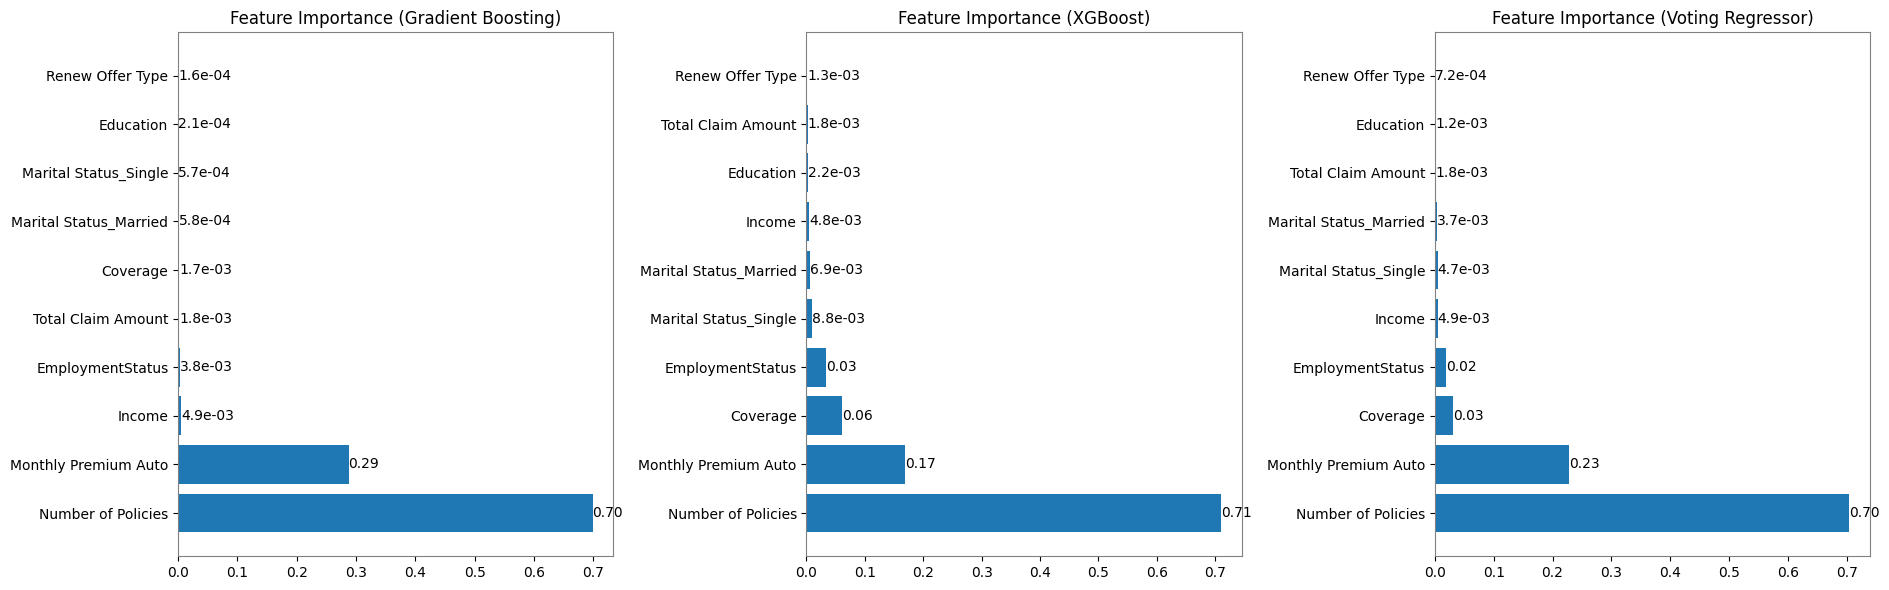

In [53]:
# Mendapatkan model dari VotingRegressor
models = {
    "Gradient Boosting": log_voting_estimator.named_estimators_["GradientBoosting"].regressor_.named_steps["model"],
    "XGBoost": log_voting_estimator.named_estimators_["XGBRegressor"].regressor_.named_steps["model"]
}

# Mendapatkan nama fitur dari transformer dan menghilangkan prefiks yang tidak diinginkan
feature_names = log_gbr_estimator.regressor_.named_steps['preprocessor'].get_feature_names_out()
feature_names = [name.replace("ordinal__", "").replace("remainder__", "").replace("onehot__", "") for name in feature_names]

# Menghitung feature importance
importance_dict = {name: model.feature_importances_ for name, model in models.items()}

# Membuat subplot untuk feature importance
fig, axes = plt.subplots(1, 3, figsize=(19, 6))

# Visualisasi feature importance
for i, (name, importance) in enumerate(importance_dict.items()):
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance}).sort_values(by="Importance", ascending=False)

    axes[i].barh(importance_df["Feature"].head(10), importance_df["Importance"].head(10))
    axes[i].set_title(f"Feature Importance ({name})")
    
    for index, value in enumerate(importance_df["Importance"].head(10)):
        # Menggunakan format eksponensial jika nilai < 0.01
        if value < 0.01:
            axes[i].text(value, index, f"{value:.1e}", va="center")
        else:
            axes[i].text(value, index, f"{value:.2f}", va="center")

    # Mengatur warna border kotak menjadi abu-abu
    for spine in axes[i].spines.values():
        spine.set_edgecolor('gray')  # Mengatur warna border

# Menghitung dan menampilkan mean feature importance untuk Voting Regressor
combined_importance = sum(importance_dict.values()) / len(importance_dict)
combined_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": combined_importance}).sort_values(by="Importance", ascending=False)

# Plot mean feature importance untuk Voting Regressor
axes[2].barh(combined_importance_df["Feature"].head(10), combined_importance_df["Importance"].head(10))
axes[2].set_title("Feature Importance (Voting Regressor)")

for index, value in enumerate(combined_importance_df["Importance"].head(10)):
    # Menggunakan format eksponensial jika nilai < 0.01
    if value < 0.01:
        axes[2].text(value, index, f"{value:.1e}", va="center")
    else:
        axes[2].text(value, index, f"{value:.2f}", va="center")
    
for spine in axes[2].spines.values():
    spine.set_edgecolor('gray')  # Mengatur warna border

plt.tight_layout()
plt.show()

Dari grafik batang Feature Importance di atas, fitur yang paling mempengaruhi model adalah `Number of Policies`, dengan kontribusi sekitar 70%. Fitur yang berpengaruh selanjutnya adalah `Monthly Premium Auto`, yang berkontribusi sekitar 23%. Sementara itu, fitur-fitur lainnya memiliki pengaruh yang tidak signifikan.

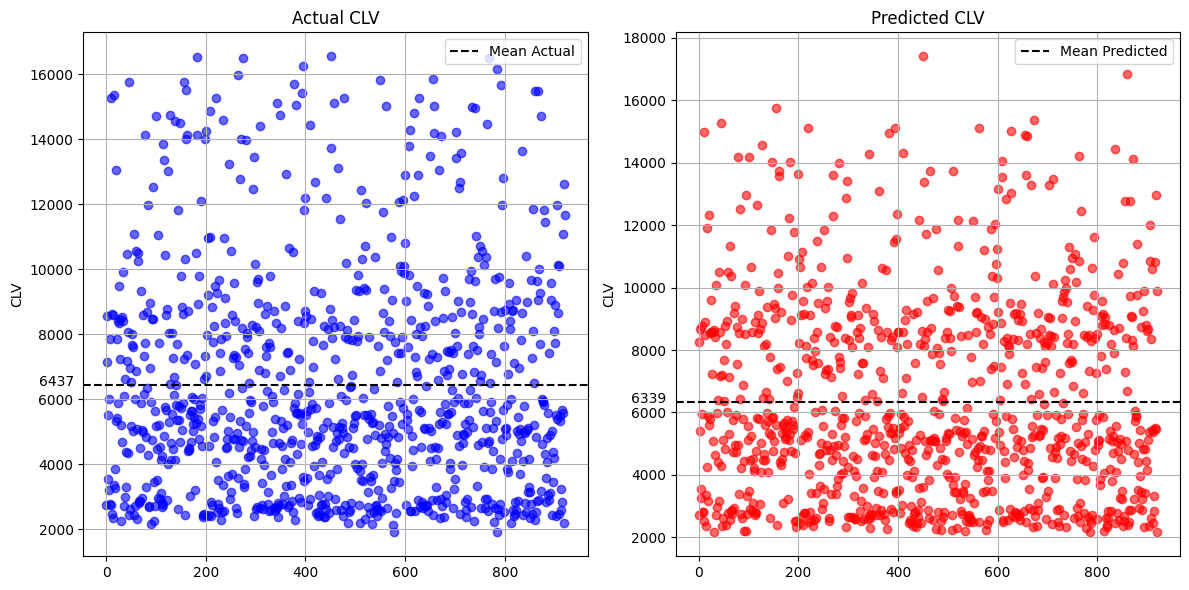

In [54]:
# y_test        = Aktual
# y_pred_voting = Predict

data = [  # Title, color
    (y_test, "Actual CLV", "b"),
    (y_pred_voting, "Predicted CLV", "r"),
]

# Membuat ukuran plot
plt.figure(figsize=(12, 6))

# Loop untuk membuat subplot
for i, (y_values, title, color) in enumerate(data):
    plt.subplot(1, 2, i + 1)  # 1 baris, 2 kolom
    plt.scatter(np.arange(len(y_values)), y_values, color=color, alpha=0.6)

    mean_value = y_values.mean()
    plt.axhline(
        y=mean_value, color="k", linestyle="--", label=f"Mean {title.split()[0]}"
    )
    plt.text(
        -65,
        mean_value + 100,
        f"{mean_value:.0f}",
        color="k",
        ha="right",
        va="center",
        fontsize=10,
    )

    plt.title(title)
    plt.xlabel("")
    plt.ylabel("CLV")
    plt.grid(True)
    plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

- Titik-titik data terlihat terdistribusi secara merata di sepanjang rentang nilai CLV
- Rata-rata Aktual Value sekitar 6437 dan Predicted Value cenderung lebih rendah dengan nilai 6339, dengan selisih 98. Data menghasilkan kesalahan sekitar 1,5% menunjukkan bahwa model sudah cukup akurat dalam memprediksi nilai CLV.
- Model menunjukkan beberapa akurasi dan menangkap beberapa pola, tetapi ada perbedaan signifikan antara Aktual Value dan Predicted Value, terlihat pada titik-titik pada Aktual Value diatas 14000 lebih banyak dari Predicted Value

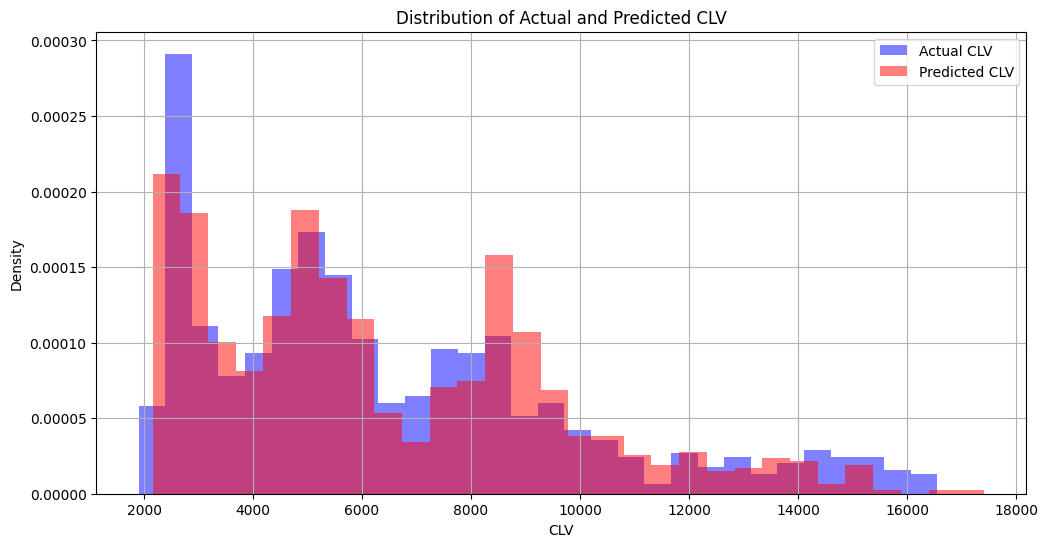

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histogram untuk y_test
plt.hist(y_test, bins=30, alpha=0.5, label='Actual CLV', color='blue', density=True)
# Histogram untuk y_pred_voting
plt.hist(y_pred_voting, bins=30, alpha=0.5, label='Predicted CLV', color='red', density=True)

plt.title('Distribution of Actual and Predicted CLV')
plt.xlabel('CLV')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Tumpang tindih antara distribusi aktual dan prediksi menunjukkan bahwa model sudah cukup mampu untuk menangkap tren dalam data. Meskipun ada kesamaan dalam pola, perbedaan pada rentang nilai yang lebih tinggi menandakan bahwa model mungkin tidak sepenuhnya efektif untuk semua segmen pelanggan, terutama yang memiliki CLV tinggi.

In [61]:
from sklearn.metrics import r2_score, accuracy_score

# y_test adalah nilai aktual dan y_pred_voting
y_actual = y_test.values  # Nilai aktual
y_pred = y_pred_voting     # Nilai prediksi

# Menghitung metrik regresi
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
# mape = mean_absolute_percentage_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
# print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')
print(f'R² Score: {r2:.2f}')

# Jika Anda ingin menggunakan akurasi dengan binning
bins = [0, 5000, 10000, 15000, 20000]  # Sesuaikan dengan rentang nilai Anda
labels = [0, 1, 2, 3]  # Label untuk kategori yang sesuai

# Mengonversi nilai kontinu menjadi kategori
y_actual_binned = np.digitize(y_actual, bins)
y_pred_binned = np.digitize(y_pred, bins)

# Menghitung akurasi
accuracy = accuracy_score(y_actual_binned, y_pred_binned)
print(f'Akurasi: {accuracy * 100:.2f}%')

Mean Squared Error (MSE): 1087363.22
Mean Absolute Error (MAE): 399.39
R² Score: 0.91
Akurasi: 91.53%


Model regresi yang dikembangkan untuk memprediksi Customer Lifetime Value (CLV) menunjukkan performa yang sangat baik, dengan hasil evaluasi sebagai berikut:

- Mean Absolute Error (MAE): 399.39, menunjukkan bahwa rata-rata, prediksi model berbeda sekitar 399.39 dari nilai aktual. Angka ini relatif kecil, menunjukkan ketepatan prediksi yang baik.

- Mean Squared Error (MSE): 1,087,363.22, memberikan gambaran tentang seberapa besar kesalahan kuadrat dari prediksi model. Meskipun nilainya cukup besar, ini adalah hasil yang umum dalam konteks regresi, dan MSE yang lebih rendah menunjukkan bahwa model berhasil meminimalkan kesalahan prediksi.

- R² Score: 0.91, menunjukkan bahwa 91% variabilitas dalam nilai aktual CLV dapat dijelaskan oleh model. Ini merupakan indikasi bahwa model cukup baik dalam menangkap hubungan antara fitur yang digunakan dan target.

- Akurasi: 91.53%, menunjukkan bahwa model mampu memprediksi kategori yang tepat dari nilai CLV dengan tingkat keberhasilan yang tinggi. Ini mengindikasikan model memiliki performa yang sangat baik dalam mengklasifikasikan prediksi ke dalam rentang yang benar.

Secara keseluruhan, model regresi ini menunjukkan kinerja yang memuaskan dan dapat diandalkan untuk memprediksi Customer Lifetime Value berdasarkan fitur yang tersedia. Dengan tingkat akurasi di atas 90%, model ini dapat digunakan untuk pengambilan keputusan bisnis yang lebih baik dan lebih efektif. Penggunaan model ini dapat membantu dalam strategi pemasaran dan pengelolaan pelanggan.

# 6. Conclusion

1. Terdapat hubungan yang jelas antara `Vehicle Class` dan `Monthly Premium Auto`. Kendaraan dalam kelas lebih tinggi, seperti `Luxury SUV` dan `Luxury Car`, berkorelasi dengan premi yang lebih tinggi, sementara kendaraan dalam kelas lebih rendah seperti `Four-Door Car` dan `Two-Door Car` menunjukkan nilai terendah. Hal ini mencerminkan strategi perusahaan dalam mengatur produk asuransi berdasarkan segmen pelanggan yang berbeda.

1. Pelanggan dengan 2 polis memiliki Customer Lifetime Value yang lebih tinggi dibandingkan pelanggan dengan 1 atau lebih dari 3 polis. Ini menunjukkan bahwa pelanggan dengan 2 polis lebih menguntungkan, mungkin karena mereka memiliki profil risiko yang lebih rendah. Sebaliknya, pelanggan dengan 1 polis mungkin cenderung kurang loyal dan berkomitmen.

1. Analisis menunjukkan bahwa pelanggan yang menganggur mengajukan klaim tertinggi meskipun tidak memiliki penghasilan. Selain itu, pelanggan dengan status marital `Single` dan pendidikan rendah lebih sering mengajukan klaim. Terdapat hubungan negatif antara Total Claim Amount dan Income, di mana semakin tinggi Total Claim Amount, semakin rendah pendapatan.

1. Setelah melakukan tuning pada model menggunakan `Voting Regressor`, diperoleh hasil evaluasi yang menunjukkan performa baik dengan RMSE sebesar 1040.35, MAE sebesar 396.19, dan MAPE sebesar 4.5%. Ini mengindikasikan bahwa model memiliki kesalahan prediksi yang rendah dan dapat diandalkan untuk estimasi harga. Namun, penting untuk memperhatikan bahwa hasil ini masih bisa terpengaruh oleh bias dalam data.

1. Model regresi untuk memprediksi Customer Lifetime Value menunjukkan kinerja yang baik dengan R² Score sebesar 0.91 dan akurasi 91.53%. Meskipun terdapat perbedaan antara nilai aktual dan prediksi, model ini mampu menangkap tren dalam data dengan baik, memberikan dasar yang kuat untuk pengambilan keputusan bisnis yang lebih baik.

1. Analisis feature importance menunjukkan bahwa `Number of Policies` dan `Monthly Premium Auto` adalah fitur yang paling berpengaruh dalam memprediksi Customer Lifetime Value, dengan kontribusi masing-masing 70% dan 23%. Hal ini menegaskan pentingnya kedua fitur tersebut dalam strategi pemasaran dan pengelolaan pelanggan.

# 7. Recommendations

1. Segmentasi Produk Asuransi: Mengingat hubungan antara Vehicle Class dan Monthly Premium Auto, perusahaan sebaiknya terus menyusun strategi produk asuransi yang sesuai dengan segmen pelanggan. Memperkuat penawaran untuk kendaraan kelas tinggi seperti Luxury SUV dan Luxury Car dapat meningkatkan premi, sementara memberikan insentif untuk kendaraan kelas rendah dapat meningkatkan penetrasi pasar.

1. Fokus pada Pelanggan dengan 2 Polis: Mengingat bahwa pelanggan dengan 2 polis memiliki Customer Lifetime Value yang lebih tinggi, perusahaan disarankan untuk memberikan program loyalitas atau insentif tambahan bagi pelanggan ini untuk menjaga dan meningkatkan retensi mereka.

1. Pendidikan dan Kesadaran Klaim: Untuk pelanggan yang lebih sering mengajukan klaim, terutama yang menganggur atau memiliki pendidikan rendah, perusahaan dapat mempertimbangkan untuk memberikan edukasi tentang penggunaan asuransi yang bijak. Ini dapat membantu mengurangi klaim yang tidak perlu dan meningkatkan kesadaran akan risiko.

1. Peningkatan Model Prediksi: Walaupun model regresi menunjukkan hasil yang baik, perusahaan perlu terus memantau dan memperbarui model prediksi dengan data terbaru untuk mengurangi potensi bias dan meningkatkan akurasi. Penggunaan teknik analisis lanjutan seperti machine learning dapat menjadi langkah yang baik untuk meningkatkan prediksi.

1. Strategi Pemasaran Berbasis Data: Mengingat pentingnya fitur Number of Policies dan Monthly Premium Auto dalam memprediksi Customer Lifetime Value, perusahaan harus mengembangkan strategi pemasaran yang lebih terfokus pada peningkatan kedua faktor tersebut. Ini bisa mencakup promosi bundle produk atau tawaran khusus bagi pelanggan yang meningkatkan polis mereka.

1. Pemantauan Terus-Menerus: Perusahaan disarankan untuk melakukan pemantauan berkelanjutan terhadap faktor-faktor yang mempengaruhi Total Claim Amount dan Customer Lifetime Value untuk memastikan bahwa strategi yang diterapkan tetap relevan dan efektif dalam memenuhi kebutuhan pelanggan.

# 8. Deployment

Setelah melakukan proses pelatihan dan evaluasi pada model prediksi CLV, kita berhasil mengidentifikasi estimator terbaik yang memberikan performa optimal, yaitu Voting Regressor. Estimator ini kemudian disimpan dalam format pickle untuk memudahkan penggunaan dan integrasi di masa mendatang, memungkinkan analisis CLV yang lebih cepat dan efisien dalam pengambilan keputusan bisnis.

In [57]:
# import pickle

In [58]:
# #Save model untuk deploy
# with open('CLV VotingRegressor Estimator.sav', 'wb') as file:
#     pickle.dump(log_voting_estimator, file)

# print("Model berhasil disimpan")

In [59]:
# # Load model
# with open('CLV VotingRegressor Estimator.sav', 'rb') as file:
#     loaded_model = pickle.load(file)

# Prediksi Customer Lifetime Value (CLV) menggunakan Pickle

Pickle adalah modul dalam Python yang digunakan untuk serialisasi dan deserialisasi objek. Dalam konteks machine learning, Pickle sering digunakan untuk menyimpan model setelah pelatihan sehingga dapat digunakan kembali tanpa perlu melatih model dari awal.



In [60]:
# import pandas as pd
# from IPython.display import display

# # Set future option for pandas to handle downcasting warnings
# pd.set_option('future.no_silent_downcasting', True)

# # Load DataFrame from CSV
# loaded_df = pd.read_csv("CLV Dataframe.csv")

# # Define input prompts for each feature
# feature_prompts = {
#     "Vehicle Class": {"1": "Four-Door Car","2": "Two-Door Car","3": "SUV","4": "Sports Car","5": "Luxury SUV","6": "Luxury Car"},
#     "Coverage": {"1": "Basic","2": "Extended","3": "Premium"},
#     "Renew Offer Type": {"1": "Offer1","2": "Offer2","3": "Offer3","4": "Offer4"},
#     "EmploymentStatus": {"1": "Employed","2": "Unemployed","3": "Medical Leave","4": "Disabled","5": "Retired"},
#     "Marital Status": {"1": "Single","2": "Married","3": "Divorced"},
#     "Education": {"1": "High School or Below","2": "College","3": "Bachelor","4": "Master","5": "Doctor"},
#     "Number of Policies": "numeric",
#     "Monthly Premium Auto": "numeric",
#     "Total Claim Amount": "numeric",
#     "Income": "numeric"
# }

# def get_input(prompt, is_numeric=False, min_val=None, max_val=None):
#     """Get user input based on prompt, and check for numeric ranges if required."""
#     if is_numeric:
#         while True:
#             try:
#                 value = float(input(prompt))
#                 if min_val is not None and max_val is not None and not (min_val <= value <= max_val):
#                     raise ValueError
#                 return value
#             except ValueError:
#                 print(f"Invalid input, please enter a number between {min_val} and {max_val}.")
#     else:
#         # print(f"Select {prompt}:")
#         # for key, value in feature_prompts[prompt].items():
#         #     print(f"{key}. {value}")
#         while True:
#             options_list = "\n".join([f"{key}. {value}" for key, value in feature_prompts[prompt].items()])
#             choice = input(f"\nSelect {prompt} (1-{len(feature_prompts[prompt])}): \n{options_list}\n\nYour Choice : ")
#             if choice in feature_prompts[prompt]:
#                 return feature_prompts[prompt][choice]
#             else:
#                 print("Invalid choice, please try again.")

# if __name__ == "__main__":
#     selections = {}
    
#     for feature, options in feature_prompts.items():
#         if options == "numeric":
#             min_val = loaded_df[feature].min()
#             max_val = loaded_df[feature].max()
#             selections[feature] = get_input(f"\nEnter {feature} ({min_val}-{max_val}): ", is_numeric=True, min_val=min_val, max_val=max_val)
#         else:
#             selections[feature] = get_input(feature)

#     # Convert selections to DataFrame
#     selections_df = pd.DataFrame(selections.items(), columns=["Feature", "Choice"])
    
#     # Display the summary of selections as DataFrame
#     print("\nSummary of your selections:")
#     display(selections_df)  # Use display() in Jupyter Notebook

#     # Prepare customer input for prediction
#     customer_df = pd.DataFrame([selections])

#     # Make prediction
#     clv_prediction = loaded_model.predict(customer_df)
#     print(f"\nCLV Prediction : {clv_prediction[0]}")
